In [ ]:
# import all relevant libraries
import re
import nltk
import gensim
import pandas as pd
from nltk.corpus import stopwords
from gensim import corpora
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import defaultdict

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


In [ ]:
# import libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import seaborn as sns
import matplotlib.colors as mcolors
from collections import Counter

In [ ]:
# read dataset into a dataframe
df = pd.read_csv('C:/Users/stsc/Desktop/Text Mining BAN 675/Project/Tweets.csv')

In [ ]:
# print dataframe
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [ ]:
# count the negative, positive and neutral tweets
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

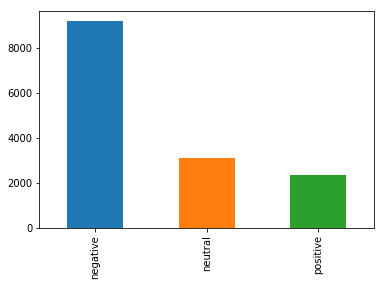

In [ ]:
# plot the distribtuion of negative, positive and neutral tweets
df['airline_sentiment'].value_counts().plot('bar')

In [ ]:
# count the tweets about each airline
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

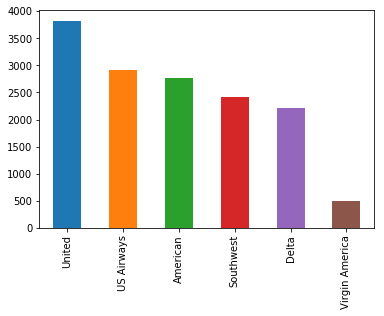

In [ ]:
# plot the distribtuion of tweets for each airline
df['airline'].value_counts().plot('bar')

In [ ]:
# create a document of all tweets
doc_complete = []
for i in df.text:
    doc_complete.append(i)

In [ ]:
# print document
doc_complete

['@VirginAmerica What @dhepburn said.',
 "@VirginAmerica plus you've added commercials to the experience... tacky.",
 "@VirginAmerica I didn't today... Must mean I need to take another trip!",
 '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "@VirginAmerica and it's a really big bad thing about it",
 "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
 '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)',
 '@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP',
 "@virginamerica Well, I didn't…but NOW I DO! :-D",
 "@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",
 '@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24',
 '@VirginAmerica I &lt;3 pretty graphic

In [ ]:
# remove stopwords from all tweets / documents and add to the list of stopwords
stop = stopwords.words('english')
newstop =["dm","way","american","want","make","first","flt","jfk","one","flightled","flighted",
          "would","plane","aa","dfw","still","us","our","ca","your","amp","u","http","https","get",
          "please","call","could","airlines","air","virginamerica","united","jetblue","southwestair",
          "delta","flights","flight","http","usairways","fly","flying","americanair","airline",
          "yes", "dallas", "let","even", "take", "said", "miami", "anything", "dca", "flightr",
          "must", "really", "gt", "sfo", "may", "lots", "im", "much", "rt", "lga", "lax", "dc", "san",
          "bos", "say", "yr", "ur", "uk", "fyi", "americanairlines","airport","tomorrow","airport",
          "hold","look","think","hour","hours","guys","ever","always", "charlotte", "due", "done", "yall",
         "virgin", "america", "tell", "told", "say", "says",]
stop.extend(newstop)

In [ ]:
# clean data of stop, irrelevant and redundant words
def clean(text):
    tokenized = nltk.word_tokenize(text)
    stop_free = [i.lower() for i in tokenized if i.lower() not in stop and i.isalpha() and len(i)>3]
    return stop_free

cleaned = [clean(i) for i in doc_complete]
print(cleaned)

In [ ]:
# create a dictionary of words in the tweets /  documents
dictionary = corpora.Dictionary(cleaned)
for i in dictionary:
    print(i,dictionary[i])

0 dhepburn
1 added
2 commercials
3 experience
4 plus
5 tacky
6 another
7 mean
8 need
9 today
10 trip
11 aggressive
12 blast
13 entertainment
14 faces
15 guests
16 little
17 obnoxious
18 recourse
19 thing
20 playing
21 seats
22 seriously
23 away
24 every
25 nearly
26 time
27 worm
28 hats
29 missed
30 opportunity
31 parody
32 prime
33 without
34 well
35 amazing
36 arrived
37 early
38 good
39 among
40 cause
41 death
42 know
43 leading
44 second
45 suicide
46 teens
47 better
48 graphics
49 iconography
50 minimal
51 pretty
52 already
53 australia
54 deal
55 gone
56 great
57 thinking
58 fabulous
59 seductive
60 skies
61 stress
62 travel
63 virginmedia
64 thanks
65 schedule
66 country
67 cross
68 excited
69 heard
70 nothing
71 things
72 either
73 flew
74 fully
75 gentleman
76 help
77 large
78 last
79 seat
80 side
81 week
82 amazingly
83 awesome
84 available
85 carriers
86 fares
87 select
88 three
89 times
90 graphic
91 love
92 brand
93 feel
94 hipster
95 innovation
96 anytime
97 making
98 per

1181 artisanal
1182 cheese
1183 pairing
1184 classy
1185 strong
1186 sure
1187 tailwind
1188 freeneversucks
1189 opens
1190 save
1191 shit
1192 bumping
1193 jezziegoldz
1194 luckily
1195 rough
1196 thestarter
1197 minneapolis
1198 paul
1199 perfect
1200 raise
1201 stay
1202 visors
1203 saying
1204 steel
1205 wifi
1206 beans
1207 richard
1208 sharing
1209 point
1210 hotspot
1211 plate
1212 infographic
1213 part
1214 segway
1215 whole
1216 defiantly
1217 europe
1218 haul
1219 short
1220 network
1221 overhead
1222 person
1223 scolding
1224 seated
1225 started
1226 calls
1227 myvxexperience
1228 flighting
1229 luck
1230 accommodate
1231 dear
1232 commercial
1233 actual
1234 exposed
1235 grouping
1236 others
1237 serv
1238 affected
1239 apathy
1240 complete
1241 shocked
1242 storm
1243 toward
1244 travelers
1245 definitive
1246 advance
1247 fees
1248 prior
1249 philly
1250 main
1251 penalty
1252 wervirgin
1253 industry
1254 months
1255 amazings
1256 fargo
1257 fargoairport
1258 kickin
1259 

2181 head
2182 shaking
2183 multiple
2184 avoid
2185 correctly
2186 management
2187 acosta
2188 angry
2189 jana
2190 lake
2191 refuses
2192 waives
2193 alwaysdelayedonunited
2194 consistent
2195 branson
2196 committed
2197 communicationfail
2198 continentalairlines
2199 merger
2200 glitch
2201 notfair
2202 flyers
2203 unaccounted
2204 maintenance
2205 states
2206 truth
2207 unfriendly
2208 personal
2209 possessions
2210 departing
2211 killing
2212 etihad
2213 lets
2214 levels
2215 lufthansa
2216 reaches
2217 realistically
2218 replacement
2219 sick
2220 theworst
2221 typical
2222 prompt
2223 simply
2224 unpleased
2225 friend
2226 speaking
2227 twice
2228 hates
2229 isis
2230 panicked
2231 driven
2232 frustration
2233 clearing
2234 effort
2235 rollerboards
2236 iove
2237 pleased
2238 campilley
2239 miscalculation
2240 aging
2241 choosing
2242 difference
2243 poorservice
2244 reuniting
2245 enquires
2246 general
2247 attention
2248 aspen
2249 aspenbaggagefail
2250 understatement
2251 pla

3180 appalled
3181 explained
3182 journey
3183 dming
3184 improvetheprocess
3185 self
3186 swipe
3187 spelled
3188 citing
3189 consistency
3190 adopted
3191 calendar
3192 inquiry
3193 universally
3194 occur
3195 perhaps
3196 retook
3197 goose
3198 goosebayairport
3199 labrador
3200 czamkoff
3201 greed
3202 ahold
3203 delete
3204 characterize
3205 ntrustopen
3206 tiffanyandco
3207 notch
3208 departures
3209 happier
3210 jockeying
3211 ontime
3212 logged
3213 redeemed
3214 priceless
3215 thread
3216 twtr
3217 occurred
3218 purchasing
3219 honalulu
3220 kauai
3221 screwing
3222 theairhelper
3223 deleted
3224 norway
3225 shoulder
3226 shrugging
3227 skilled
3228 alliance
3229 belong
3230 dependable
3231 hemisphere
3232 skyteam
3233 star
3234 western
3235 staffed
3236 anthony
3237 helpfulness
3238 hospitality
3239 lastella
3240 buzzkill
3241 enjoying
3242 boot
3243 snowboard
3244 standard
3245 emptied
3246 pressurization
3247 juan
3248 personnel
3249 honolulu
3250 distressed
3251 particular

4180 narita
4181 tokyo
4182 played
4183 cream
4184 gently
4185 pile
4186 whipped
4187 canadaair
4188 jets
4189 abuse
4190 overcharge
4191 privilege
4192 robthecameraman
4193 airfarewatchdog
4194 accurate
4195 tripitpro
4196 potential
4197 standbye
4198 transparency
4199 sarah
4200 stocker
4201 victim
4202 boiled
4203 preventative
4204 unresolved
4205 bloated
4206 narrower
4207 clarifying
4208 patiently
4209 lightbulb
4210 companion
4211 necessary
4212 chocolate
4213 handshake
4214 problemsolvers
4215 fans
4216 thousand
4217 utmost
4218 tpallini
4219 hurricane
4220 checkers
4221 overkill
4222 clarkhoward
4223 kathryn
4224 sotelo
4225 arrange
4226 aggravation
4227 costing
4228 stow
4229 father
4230 waitlisted
4231 compton
4232 jeff
4233 smisek
4234 insurance
4235 lifetime
4236 burn
4237 chill
4238 ithica
4239 wind
4240 words
4241 exceptions
4242 misplaced
4243 keepingtraditionsalive
4244 thanksunited
4245 tasty
4246 upgrd
4247 laguardia
4248 mouse
4249 size
4250 table
4251 tray
4252 kath

5179 assignments
5180 untrained
5181 boat
5182 crossing
5183 pointing
5184 whispering
5185 bitty
5186 acquire
5187 distance
5188 bizarre
5189 outage
5190 bandwidth
5191 flightncy
5192 gogo
5193 pricing
5194 hubs
5195 outdated
5196 myers
5197 thankful
5198 blegh
5199 braved
5200 shipping
5201 edition
5202 dime
5203 brandi
5204 delight
5205 zabsonre
5206 durango
5207 farmington
5208 hitting
5209 slopes
5210 rajuchinthala
5211 feck
5212 improvements
5213 meantime
5214 transpacific
5215 survive
5216 casleah
5217 jsumiyasu
5218 gist
5219 indicating
5220 aback
5221 shoulders
5222 squarely
5223 disorganized
5224 stays
5225 cockup
5226 ijustwanttosleep
5227 swag
5228 proficient
5229 proactive
5230 reactive
5231 getphilz
5232 juice
5233 clusterfucks
5234 incl
5235 overheard
5236 moar
5237 bully
5238 dropping
5239 employeerelations
5240 fostering
5241 greater
5242 inspiration
5243 mentality
5244 btwn
5245 ports
5246 torture
5247 biscuits
5248 crâpe
5249 heartbroken
5250 sentimental
5251 connetio

6429 anticipate
6430 leeannhealey
6431 beatsmusic
6432 personalized
6433 demolish
6434 snapchat
6435 imessage
6436 bloody
6437 repartee
6438 witty
6439 attentive
6440 bicycles
6441 bikes
6442 criteria
6443 lanes
6444 luvsw
6445 curb
6446 bingo
6447 noah
6448 ireland
6449 postcode
6450 messaging
6451 giant
6452 require
6453 stewardesses
6454 humphrey
6455 sing
6456 maybeijustlost
6457 whyyounoloveme
6458 ahhhh
6459 lauren
6460 sets
6461 taylormdowns
6462 karajusto
6463 fedexed
6464 worstthingever
6465 ubergizmo
6466 courtney
6467 expedite
6468 vinylvegas
6469 anni
6470 brent
6471 jamesasworth
6472 additonal
6473 cantblametheweather
6474 mhtforlife
6475 swadiversity
6476 brendan
6477 brendanpshannon
6478 announcing
6479 kindly
6480 university
6481 straying
6482 ifeeldumb
6483 thingsishouldknow
6484 craving
6485 roadtrip
6486 pastmypatienceexpirationdate
6487 inclusion
6488 popping
6489 jackass
6490 caribbean
6491 kirkwoodtiger
6492 saysorrychris
6493 lead
6494 customerservicewin
6495 itr

7178 gorgeous
7179 newburg
7180 gracious
7181 investigation
7182 umosaicmecrazy
7183 autoresponse
7184 cannedtweet
7185 demanded
7186 handles
7187 waved
7188 inserted
7189 truebluecolors
7190 circling
7191 updateyourwebsite
7192 desires
7193 dobetterjetblue
7194 ideal
7195 carta
7196 apnea
7197 coles
7198 glenn
7199 direction
7200 unlucky
7201 sunshine
7202 woulda
7203 haning
7204 mosaicmecrazy
7205 nofilterneeded
7206 circle
7207 upstate
7208 miraculously
7209 higherandhigher
7210 liftin
7211 resources
7212 brandloveaffair
7213 soulandinspiration
7214 takr
7215 erie
7216 fllairport
7217 kill
7218 nine
7219 authority
7220 port
7221 badairline
7222 scheme
7223 pitts
7224 tfgreenairport
7225 protection
7226 wore
7227 protocol
7228 sylvie
7229 yourock
7230 eternity
7231 animal
7232 hella
7233 bumper
7234 americanairbr
7235 surprises
7236 dubai
7237 misbehavior
7238 controllers
7239 equalizer
7240 shucks
7241 engagements
7242 minimum
7243 backhome
7244 pandora
7245 relationships
7246 hesit

8178 hhagerty
8179 cbsnews
8180 shined
8181 thur
8182 chairmans
8183 lostandforgotten
8184 nailed
8185 nines
8186 shadier
8187 shutting
8188 flydelta
8189 flyjetblue
8190 theyareallbetter
8191 exhaustion
8192 killin
8193 runnin
8194 shock
8195 bussey
8196 derrick
8197 reiterate
8198 misunderstood
8199 unreasonable
8200 offended
8201 notourfaultyoudontuseyourgatesright
8202 sided
8203 owes
8204 tammy
8205 logistically
8206 desition
8207 nade
8208 goodgriefpeople
8209 parizad
8210 manifests
8211 wedontcarebecauseyoupaidalready
8212 backs
8213 cltdouglas
8214 takeresponsibility
8215 diane
8216 assurances
8217 deteriorating
8218 enters
8219 marvinatorsb
8220 thnk
8221 deplanes
8222 german
8223 jealous
8224 shorts
8225 wiedersehen
8226 applaud
8227 sticker
8228 endlessly
8229 gatwick
8230 periods
8231 dividendsmember
8232 publicity
8233 cargo
8234 afterward
8235 resorting
8236 depot
8237 squeaks
8238 restrooms
8239 inconvenienced
8240 faced
8241 inputted
8242 sittingontheplane
8243 asha
824

9217 character
9218 speciifc
9219 hogs
9220 impediment
9221 duke
9222 mason
9223 registering
9224 researching
9225 contaced
9226 eyewitness
9227 unheard
9228 manned
9229 crickets
9230 smth
9231 ubetter
9232 seet
9233 dating
9234 optimistic
9235 tara
9236 coin
9237 onehouronhold
9238 perks
9239 senseless
9240 reactivate
9241 casimir
9242 nocareforcustomers
9243 filthyplane
9244 hopeidonotgetsick
9245 mold
9246 nexttimeiwillflysouthwest
9247 prds
9248 prolonged
9249 allende
9250 chef
9251 miguel
9252 hungupnohelp
9253 andrew
9254 rollercoaster
9255 killeen
9256 droped
9257 aadv
9258 rwrd
9259 narrowly
9260 snags
9261 pbpinftworth
9262 robertdwyer
9263 americanairlinesfail
9264 choppiest
9265 iwantmymoneyback
9266 whiplash
9267 reversed
9268 stuckinmemphis
9269 texasisclosed
9270 faves
9271 thenewamerican
9272 sheesh
9273 espinosa
9274 crated
9275 pets
9276 inexperienced
9277 painfully
9278 paged
9279 spaced
9280 biggie
9281 coached
9282 itunesmusic
9283 rams
9284 spagnuolo
9285 whammie
9

In [ ]:
#index the words and calculate the frequency of each word in each tweet
document_term_matrix = [dictionary.doc2bow(i) for i in cleaned]
print(document_term_matrix)

[[(0, 1)], [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1)], [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(19, 1)], [(19, 1), (20, 1), (21, 1), (22, 1)], [(23, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [(28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(34, 1)], [(35, 1), (36, 1), (37, 1), (38, 1)], [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)], [(47, 1), (48, 1), (49, 1), (50, 1), (51, 1)], [(10, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)], [(23, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)], [(64, 1)], [(65, 1)], [(56, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)], [(72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1)], [], [(42, 1), (82, 1), (83, 1)], [(21, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1)], [(90, 1), (91, 1)], [(38, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1)], [(96, 1), (97, 1), (98, 1

In [ ]:
# create an ldamodel for topic modelling
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(document_term_matrix, num_topics=10, id2word = dictionary)
print(ldamodel)

LdaModel(num_terms=10206, num_topics=10, decay=0.5, chunksize=2000)


In [ ]:
# create 10 topics
top_10 = ldamodel.print_topics(num_topics=10, num_words=10)
print(top_10)    

[(0, '0.018*"book" + 0.018*"ticket" + 0.015*"money" + 0.012*"trying" + 0.011*"credit" + 0.010*"sucks" + 0.010*"service" + 0.010*"booked" + 0.009*"tickets" + 0.009*"going"'), (1, '0.021*"like" + 0.014*"service" + 0.014*"good" + 0.013*"rude" + 0.011*"right" + 0.010*"catering" + 0.010*"know" + 0.010*"staff" + 0.009*"looks" + 0.009*"automated"'), (2, '0.041*"cancelled" + 0.023*"late" + 0.021*"weather" + 0.019*"bags" + 0.017*"luggage" + 0.016*"passengers" + 0.015*"rebooked" + 0.012*"delayed" + 0.011*"waiting" + 0.010*"going"'), (3, '0.059*"service" + 0.054*"customer" + 0.014*"great" + 0.013*"wait" + 0.012*"thanks" + 0.011*"mins" + 0.010*"line" + 0.010*"time" + 0.009*"find" + 0.009*"waiting"'), (4, '0.048*"help" + 0.031*"cancelled" + 0.025*"need" + 0.025*"minutes" + 0.019*"waiting" + 0.018*"change" + 0.016*"phone" + 0.015*"reservation" + 0.014*"trying" + 0.011*"wait"'), (5, '0.035*"thank" + 0.035*"help" + 0.026*"phone" + 0.019*"cancelled" + 0.016*"time" + 0.014*"times" + 0.013*"thanks" + 0.0

In [ ]:
# make a list of top 10 words in each of the 10 topics
# check polarity scores of each topic and assign negative, neutral positive tone to each topic
wordbag = []
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]
print("topic words polarity")
for i in top_10:
    index = i[0]
    wordbag = re.findall('[a-z]{1,}',i[1])
    topictext = ' '.join(wordbag)
    analyzer = SentimentIntensityAnalyzer()
    polarity = analyzer.polarity_scores(topictext)
    if (polarity['compound']) >= 0.3:
        pos_word_list.append(index)
    elif (polarity['compound']) <= -0.3:
        neg_word_list.append(index)
    else:
        neu_word_list.append(index)
    print(index, wordbag, '\n', polarity)

topic words polarity
0 ['book', 'ticket', 'money', 'trying', 'credit', 'sucks', 'service', 'booked', 'tickets', 'going'] 
 {'neg': 0.191, 'neu': 0.611, 'pos': 0.198, 'compound': 0.0258}
1 ['like', 'service', 'good', 'rude', 'right', 'catering', 'know', 'staff', 'looks', 'automated'] 
 {'neg': 0.195, 'neu': 0.455, 'pos': 0.351, 'compound': 0.34}
2 ['cancelled', 'late', 'weather', 'bags', 'luggage', 'passengers', 'rebooked', 'delayed', 'waiting', 'going'] 
 {'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'compound': -0.4404}
3 ['service', 'customer', 'great', 'wait', 'thanks', 'mins', 'line', 'time', 'find', 'waiting'] 
 {'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'compound': 0.7906}
4 ['help', 'cancelled', 'need', 'minutes', 'waiting', 'change', 'phone', 'reservation', 'trying', 'wait'] 
 {'neg': 0.157, 'neu': 0.63, 'pos': 0.213, 'compound': 0.1779}
5 ['thank', 'help', 'phone', 'cancelled', 'time', 'times', 'thanks', 'today', 'online', 'back'] 
 {'neg': 0.124, 'neu': 0.373, 'pos': 0.503, 'compoun

In [ ]:
# identify the topics in each of the three categories
print('Positive:',pos_word_list)        
print('Neutral:',neu_word_list)    
print('Negative:',neg_word_list)

Positive: [1, 3, 5, 8]
Neutral: [0, 4, 7]
Negative: [2, 6, 9]


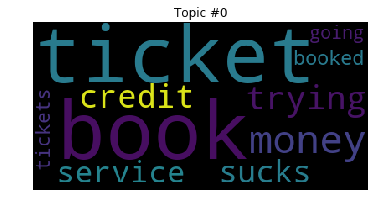

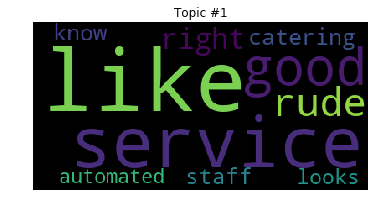

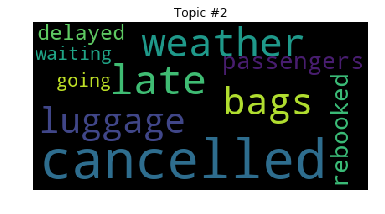

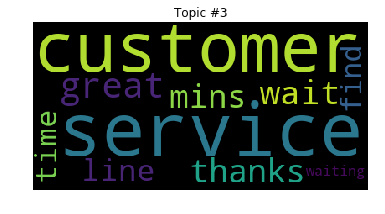

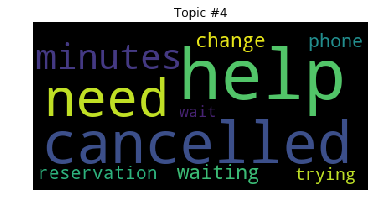

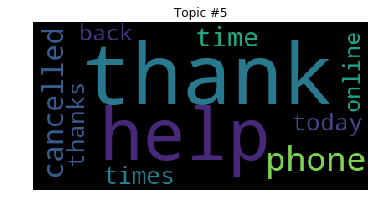

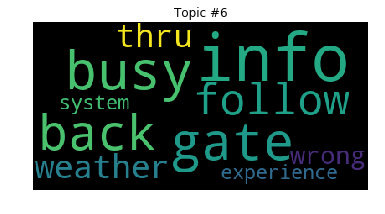

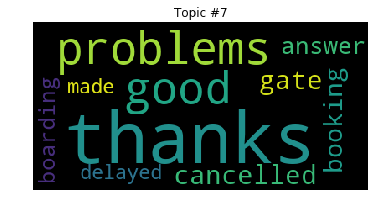

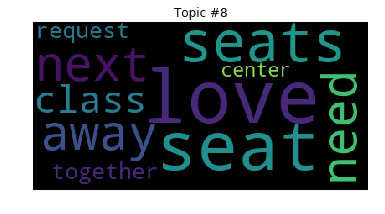

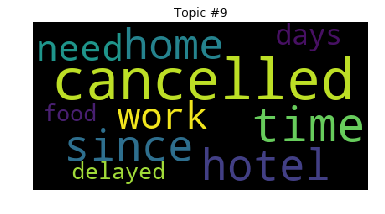

In [ ]:
# create word clouds for each of the topics
for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamodel .show_topic(t, 10))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show() 

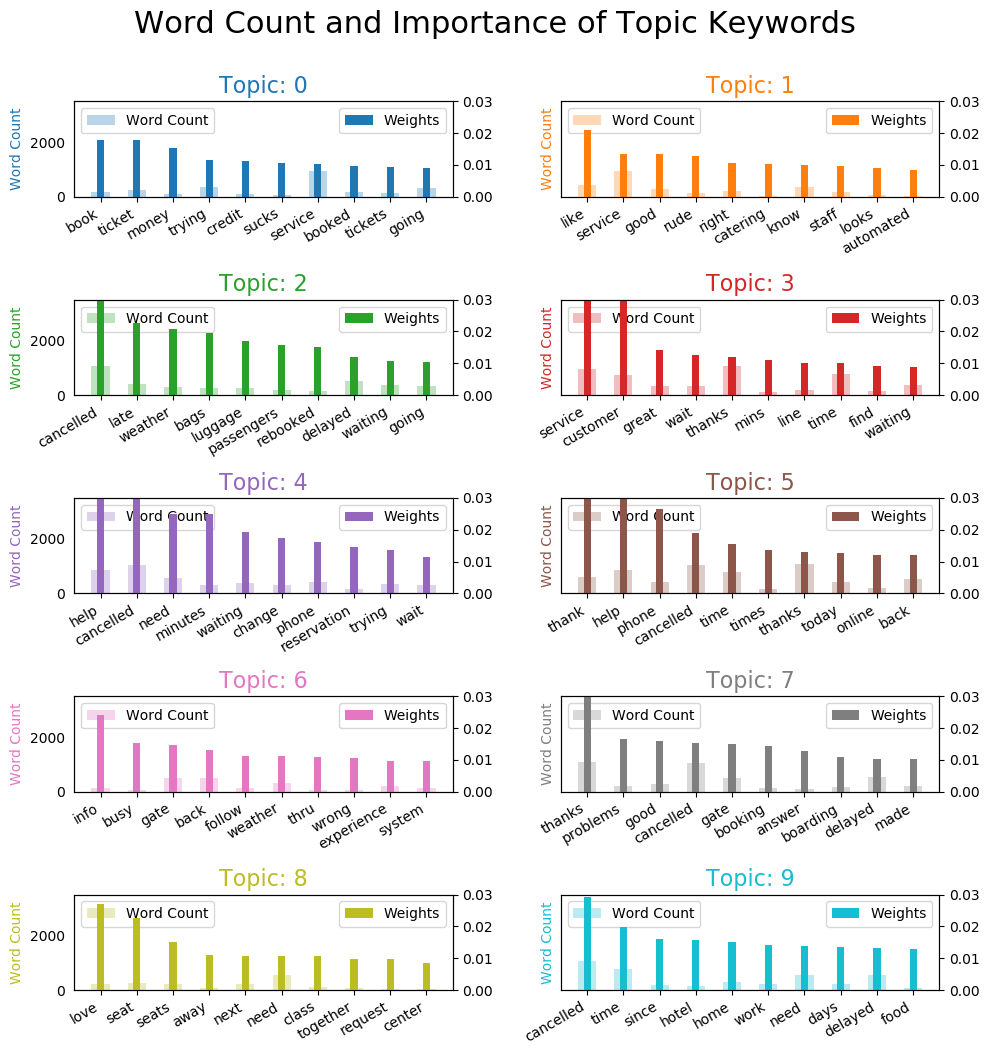

In [ ]:
# calculate word count and importance of eack keyword in a topic to find out topic title
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in cleaned for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

dataf = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(10,10), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dataf.loc[dataf.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dataf.loc[dataf.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dataf.loc[dataf.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [ ]:
# asses topic focus from the word clouds and charts above
Topic_1 = "Booking Process"
Topic_2 = "Customer Experience"
Topic_3 = "Customer Grievance"
Topic_4 = "Customer Service"
Topic_5 = "Help"
Topic_6 = "Customer Satisfaction"
Topic_7 = "Information"
Topic_8 = "Problems"
Topic_9 = "In-flight experience"
Topic_10 = "Cancellations"
Topics = [Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10]

In [ ]:
# check probability of each of the 10 topics for one sample tweet
print(ldamodel.get_document_topics(document_term_matrix[18]))

[(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]


In [ ]:
# identify the topic for each tweet / document based on the maximum probability from the 10 topics
# and caluclate the number of appearances of each topic in the complete list of tweets / documents i.e. most frequest topic

appearances = defaultdict(int)
for i in range(0,14639):
    topic_distribution = (ldamodel.get_document_topics(document_term_matrix[i]))
    loading=[j[1] for j in topic_distribution]
    maxloading = max(loading)
    index = loading.index(maxloading)
    topicname = Topics[index]
    appearances[topicname] += 1
    print('for tweet %s'%i, 'the topic is %s'%topicname, 'with a probability of %s'%maxloading)

for tweet 0 the topic is Problems with a probability of 0.100077614
for tweet 1 the topic is Information with a probability of 0.83864963
for tweet 2 the topic is Help with a probability of 0.8499513
for tweet 3 the topic is Customer Satisfaction with a probability of 0.89974797
for tweet 4 the topic is Information with a probability of 0.5499365
for tweet 5 the topic is Information with a probability of 0.8199231
for tweet 6 the topic is In-flight experience with a probability of 0.5829869
for tweet 7 the topic is Help with a probability of 0.8602711
for tweet 8 the topic is Customer Satisfaction with a probability of 0.5499099
for tweet 9 the topic is Booking Process with a probability of 0.42906746
for tweet 10 the topic is Cancellations with a probability of 0.8999852
for tweet 11 the topic is Customer Experience with a probability of 0.80130255
for tweet 12 the topic is Customer Service with a probability of 0.41032898
for tweet 13 the topic is In-flight experience with a probabil

for tweet 123 the topic is Customer Service with a probability of 0.6165545
for tweet 124 the topic is Customer Service with a probability of 0.5215704
for tweet 125 the topic is Problems with a probability of 0.5799322
for tweet 126 the topic is Booking Process with a probability of 0.8239165
for tweet 127 the topic is Customer Experience with a probability of 0.8219645
for tweet 128 the topic is Help with a probability of 0.5499314
for tweet 129 the topic is Customer Grievance with a probability of 0.5499359
for tweet 130 the topic is Customer Experience with a probability of 0.4445464
for tweet 131 the topic is Customer Grievance with a probability of 0.87120026
for tweet 132 the topic is Customer Satisfaction with a probability of 0.5766941
for tweet 133 the topic is Customer Grievance with a probability of 0.31015936
for tweet 134 the topic is Customer Grievance with a probability of 0.70154333
for tweet 135 the topic is Booking Process with a probability of 0.6231106
for tweet 13

for tweet 272 the topic is Information with a probability of 0.74208844
for tweet 273 the topic is Information with a probability of 0.3756301
for tweet 274 the topic is In-flight experience with a probability of 0.9099875
for tweet 275 the topic is Customer Experience with a probability of 0.3883836
for tweet 276 the topic is Booking Process with a probability of 0.1
for tweet 277 the topic is Help with a probability of 0.77166826
for tweet 278 the topic is Booking Process with a probability of 0.5236771
for tweet 279 the topic is Problems with a probability of 0.39452255
for tweet 280 the topic is Customer Experience with a probability of 0.8178127
for tweet 281 the topic is Customer Satisfaction with a probability of 0.54998857
for tweet 282 the topic is Customer Satisfaction with a probability of 0.6828025
for tweet 283 the topic is Customer Experience with a probability of 0.77495635
for tweet 284 the topic is Information with a probability of 0.42381144
for tweet 285 the topic is

for tweet 396 the topic is Customer Satisfaction with a probability of 0.8713979
for tweet 397 the topic is Customer Experience with a probability of 0.55752265
for tweet 398 the topic is In-flight experience with a probability of 0.84992456
for tweet 399 the topic is In-flight experience with a probability of 0.8713709
for tweet 400 the topic is Customer Satisfaction with a probability of 0.64804924
for tweet 401 the topic is Problems with a probability of 0.4419422
for tweet 402 the topic is Customer Experience with a probability of 0.27749988
for tweet 403 the topic is Customer Experience with a probability of 0.62822187
for tweet 404 the topic is Customer Experience with a probability of 0.46465182
for tweet 405 the topic is Customer Satisfaction with a probability of 0.69993514
for tweet 406 the topic is In-flight experience with a probability of 0.7749294
for tweet 407 the topic is Customer Experience with a probability of 0.8248889
for tweet 408 the topic is Customer Grievance w

for tweet 541 the topic is Booking Process with a probability of 0.8686553
for tweet 542 the topic is Customer Experience with a probability of 0.808338
for tweet 543 the topic is Booking Process with a probability of 0.5726033
for tweet 544 the topic is Customer Experience with a probability of 0.5687425
for tweet 545 the topic is Help with a probability of 0.5772962
for tweet 546 the topic is Cancellations with a probability of 0.5499423
for tweet 547 the topic is Customer Service with a probability of 0.67280704
for tweet 548 the topic is Customer Experience with a probability of 0.75544715
for tweet 549 the topic is Customer Satisfaction with a probability of 0.36665338
for tweet 550 the topic is Help with a probability of 0.54675114
for tweet 551 the topic is Customer Experience with a probability of 0.38160974
for tweet 552 the topic is Help with a probability of 0.42143998
for tweet 553 the topic is In-flight experience with a probability of 0.25712192
for tweet 554 the topic is

for tweet 703 the topic is Booking Process with a probability of 0.39169407
for tweet 704 the topic is Cancellations with a probability of 0.71741045
for tweet 705 the topic is Customer Satisfaction with a probability of 0.69992894
for tweet 706 the topic is Customer Satisfaction with a probability of 0.4436676
for tweet 707 the topic is Booking Process with a probability of 0.8253652
for tweet 708 the topic is Customer Grievance with a probability of 0.65803504
for tweet 709 the topic is Information with a probability of 0.4686768
for tweet 710 the topic is Customer Experience with a probability of 0.5218942
for tweet 711 the topic is Help with a probability of 0.5046474
for tweet 712 the topic is Help with a probability of 0.4912062
for tweet 713 the topic is Customer Experience with a probability of 0.79903275
for tweet 714 the topic is Customer Service with a probability of 0.36356565
for tweet 715 the topic is Customer Satisfaction with a probability of 0.75679344
for tweet 716 th

for tweet 848 the topic is Problems with a probability of 0.7350839
for tweet 849 the topic is Customer Grievance with a probability of 0.29125458
for tweet 850 the topic is Booking Process with a probability of 0.71051186
for tweet 851 the topic is Information with a probability of 0.523493
for tweet 852 the topic is Problems with a probability of 0.472027
for tweet 853 the topic is Customer Grievance with a probability of 0.8999001
for tweet 854 the topic is Customer Experience with a probability of 0.5034353
for tweet 855 the topic is Customer Grievance with a probability of 0.62069434
for tweet 856 the topic is Booking Process with a probability of 0.76395506
for tweet 857 the topic is Customer Grievance with a probability of 0.40942326
for tweet 858 the topic is Information with a probability of 0.64856786
for tweet 859 the topic is Customer Grievance with a probability of 0.36685586
for tweet 860 the topic is Customer Service with a probability of 0.47190788
for tweet 861 the top

for tweet 1051 the topic is Help with a probability of 0.5559394
for tweet 1052 the topic is Information with a probability of 0.7187915
for tweet 1053 the topic is Customer Experience with a probability of 0.3908893
for tweet 1054 the topic is Problems with a probability of 0.54998034
for tweet 1055 the topic is In-flight experience with a probability of 0.5409581
for tweet 1056 the topic is Customer Satisfaction with a probability of 0.55146176
for tweet 1057 the topic is Booking Process with a probability of 0.58093405
for tweet 1058 the topic is Customer Grievance with a probability of 0.41693866
for tweet 1059 the topic is Customer Service with a probability of 0.60326254
for tweet 1060 the topic is Customer Grievance with a probability of 0.5798936
for tweet 1061 the topic is Booking Process with a probability of 0.1
for tweet 1062 the topic is Customer Service with a probability of 0.6999359
for tweet 1063 the topic is Help with a probability of 0.7686935
for tweet 1064 the topi

for tweet 1228 the topic is Customer Satisfaction with a probability of 0.37790522
for tweet 1229 the topic is Customer Satisfaction with a probability of 0.8355327
for tweet 1230 the topic is Help with a probability of 0.60049117
for tweet 1231 the topic is Customer Service with a probability of 0.27884755
for tweet 1232 the topic is Customer Experience with a probability of 0.7491447
for tweet 1233 the topic is Customer Experience with a probability of 0.5544411
for tweet 1234 the topic is Customer Service with a probability of 0.52270114
for tweet 1235 the topic is Customer Satisfaction with a probability of 0.69996387
for tweet 1236 the topic is Cancellations with a probability of 0.5500652
for tweet 1237 the topic is Customer Grievance with a probability of 0.6793544
for tweet 1238 the topic is Customer Experience with a probability of 0.8499757
for tweet 1239 the topic is In-flight experience with a probability of 0.7749893
for tweet 1240 the topic is Booking Process with a proba

for tweet 1377 the topic is Customer Experience with a probability of 0.6888761
for tweet 1378 the topic is Information with a probability of 0.434613
for tweet 1379 the topic is Customer Grievance with a probability of 0.7749816
for tweet 1380 the topic is Customer Experience with a probability of 0.60011196
for tweet 1381 the topic is Help with a probability of 0.788993
for tweet 1382 the topic is Problems with a probability of 0.38764992
for tweet 1383 the topic is Customer Service with a probability of 0.72025853
for tweet 1384 the topic is Information with a probability of 0.36100495
for tweet 1385 the topic is Customer Satisfaction with a probability of 0.60306585
for tweet 1386 the topic is Booking Process with a probability of 0.9181528
for tweet 1387 the topic is Customer Service with a probability of 0.27958345
for tweet 1388 the topic is Cancellations with a probability of 0.72552764
for tweet 1389 the topic is Information with a probability of 0.6975109
for tweet 1390 the t

for tweet 1516 the topic is Customer Grievance with a probability of 0.46436992
for tweet 1517 the topic is Problems with a probability of 0.77491224
for tweet 1518 the topic is Cancellations with a probability of 0.3614398
for tweet 1519 the topic is Customer Satisfaction with a probability of 0.81996226
for tweet 1520 the topic is Customer Experience with a probability of 0.75279945
for tweet 1521 the topic is Help with a probability of 0.5176135
for tweet 1522 the topic is Customer Grievance with a probability of 0.46099818
for tweet 1523 the topic is Customer Service with a probability of 0.30898154
for tweet 1524 the topic is Information with a probability of 0.62818855
for tweet 1525 the topic is Customer Grievance with a probability of 0.59282565
for tweet 1526 the topic is Help with a probability of 0.68291545
for tweet 1527 the topic is Help with a probability of 0.90997905
for tweet 1528 the topic is Customer Satisfaction with a probability of 0.633398
for tweet 1529 the topi

for tweet 1750 the topic is Customer Grievance with a probability of 0.39822176
for tweet 1751 the topic is Customer Satisfaction with a probability of 0.49345893
for tweet 1752 the topic is Customer Experience with a probability of 0.6981399
for tweet 1753 the topic is Customer Satisfaction with a probability of 0.2774042
for tweet 1754 the topic is Customer Service with a probability of 0.46225762
for tweet 1755 the topic is Booking Process with a probability of 0.44305527
for tweet 1756 the topic is Problems with a probability of 0.5084074
for tweet 1757 the topic is Information with a probability of 0.41799203
for tweet 1758 the topic is Cancellations with a probability of 0.3620803
for tweet 1759 the topic is Problems with a probability of 0.8706413
for tweet 1760 the topic is Customer Service with a probability of 0.52792424
for tweet 1761 the topic is Problems with a probability of 0.7829264
for tweet 1762 the topic is Customer Satisfaction with a probability of 0.6999213
for tw

for tweet 1894 the topic is Customer Satisfaction with a probability of 0.42453563
for tweet 1895 the topic is In-flight experience with a probability of 0.6176121
for tweet 1896 the topic is Customer Experience with a probability of 0.57824576
for tweet 1897 the topic is Customer Service with a probability of 0.6982979
for tweet 1898 the topic is Booking Process with a probability of 0.60204786
for tweet 1899 the topic is Customer Satisfaction with a probability of 0.5748478
for tweet 1900 the topic is In-flight experience with a probability of 0.774883
for tweet 1901 the topic is Help with a probability of 0.5658526
for tweet 1902 the topic is Customer Experience with a probability of 0.8874287
for tweet 1903 the topic is Customer Service with a probability of 0.77480066
for tweet 1904 the topic is Customer Grievance with a probability of 0.6883222
for tweet 1905 the topic is Customer Grievance with a probability of 0.4035223
for tweet 1906 the topic is Booking Process with a probabi

for tweet 2060 the topic is Customer Service with a probability of 0.6447192
for tweet 2061 the topic is Booking Process with a probability of 0.5412302
for tweet 2062 the topic is Help with a probability of 0.45194703
for tweet 2063 the topic is Customer Grievance with a probability of 0.5633565
for tweet 2064 the topic is Customer Experience with a probability of 0.82281065
for tweet 2065 the topic is Customer Grievance with a probability of 0.5499762
for tweet 2066 the topic is Customer Grievance with a probability of 0.70153177
for tweet 2067 the topic is Customer Experience with a probability of 0.7749179
for tweet 2068 the topic is Customer Grievance with a probability of 0.46898025
for tweet 2069 the topic is Customer Experience with a probability of 0.30902648
for tweet 2070 the topic is Cancellations with a probability of 0.52481514
for tweet 2071 the topic is Problems with a probability of 0.728808
for tweet 2072 the topic is Customer Grievance with a probability of 0.4945973

for tweet 2227 the topic is Information with a probability of 0.7682107
for tweet 2228 the topic is Customer Satisfaction with a probability of 0.51910055
for tweet 2229 the topic is Customer Grievance with a probability of 0.5226957
for tweet 2230 the topic is Information with a probability of 0.36802092
for tweet 2231 the topic is Customer Satisfaction with a probability of 0.46111733
for tweet 2232 the topic is Problems with a probability of 0.51159185
for tweet 2233 the topic is Customer Service with a probability of 0.5873541
for tweet 2234 the topic is Information with a probability of 0.6734368
for tweet 2235 the topic is Customer Grievance with a probability of 0.55954987
for tweet 2236 the topic is Help with a probability of 0.38708827
for tweet 2237 the topic is Customer Service with a probability of 0.5499315
for tweet 2238 the topic is Customer Service with a probability of 0.5499821
for tweet 2239 the topic is Customer Service with a probability of 0.6589768
for tweet 2240

for tweet 2393 the topic is Customer Experience with a probability of 0.77890253
for tweet 2394 the topic is In-flight experience with a probability of 0.28520977
for tweet 2395 the topic is Help with a probability of 0.61918133
for tweet 2396 the topic is Customer Satisfaction with a probability of 0.77610105
for tweet 2397 the topic is Problems with a probability of 0.42863065
for tweet 2398 the topic is Problems with a probability of 0.56670946
for tweet 2399 the topic is Customer Experience with a probability of 0.48586038
for tweet 2400 the topic is Information with a probability of 0.70227295
for tweet 2401 the topic is Customer Service with a probability of 0.41255972
for tweet 2402 the topic is Booking Process with a probability of 0.64867985
for tweet 2403 the topic is Booking Process with a probability of 0.3594194
for tweet 2404 the topic is Customer Experience with a probability of 0.50056165
for tweet 2405 the topic is Customer Grievance with a probability of 0.87140125
fo

for tweet 2560 the topic is Customer Grievance with a probability of 0.7749665
for tweet 2561 the topic is Problems with a probability of 0.37953025
for tweet 2562 the topic is Booking Process with a probability of 0.4657835
for tweet 2563 the topic is In-flight experience with a probability of 0.45619142
for tweet 2564 the topic is Customer Experience with a probability of 0.6552805
for tweet 2565 the topic is Cancellations with a probability of 0.7769564
for tweet 2566 the topic is Customer Experience with a probability of 0.7852863
for tweet 2567 the topic is Customer Grievance with a probability of 0.6008675
for tweet 2568 the topic is Customer Service with a probability of 0.31771109
for tweet 2569 the topic is Problems with a probability of 0.5208184
for tweet 2570 the topic is Customer Satisfaction with a probability of 0.77496654
for tweet 2571 the topic is Customer Service with a probability of 0.67842984
for tweet 2572 the topic is Customer Experience with a probability of 0.

for tweet 2705 the topic is Customer Service with a probability of 0.61286163
for tweet 2706 the topic is Customer Service with a probability of 0.6314824
for tweet 2707 the topic is Customer Experience with a probability of 0.3746784
for tweet 2708 the topic is Help with a probability of 0.6660979
for tweet 2709 the topic is Problems with a probability of 0.47671935
for tweet 2710 the topic is Customer Grievance with a probability of 0.5209267
for tweet 2711 the topic is In-flight experience with a probability of 0.36300218
for tweet 2712 the topic is In-flight experience with a probability of 0.49161112
for tweet 2713 the topic is Cancellations with a probability of 0.36377108
for tweet 2714 the topic is Customer Grievance with a probability of 0.32700697
for tweet 2715 the topic is Booking Process with a probability of 0.45928374
for tweet 2716 the topic is Customer Experience with a probability of 0.6999389
for tweet 2717 the topic is Information with a probability of 0.5499247
for

for tweet 2883 the topic is Problems with a probability of 0.4549363
for tweet 2884 the topic is In-flight experience with a probability of 0.46946242
for tweet 2885 the topic is Information with a probability of 0.49885374
for tweet 2886 the topic is In-flight experience with a probability of 0.486715
for tweet 2887 the topic is Booking Process with a probability of 0.6743479
for tweet 2888 the topic is Customer Satisfaction with a probability of 0.36683515
for tweet 2889 the topic is Customer Satisfaction with a probability of 0.37386847
for tweet 2890 the topic is Problems with a probability of 0.54998034
for tweet 2891 the topic is Customer Satisfaction with a probability of 0.58024335
for tweet 2892 the topic is Customer Experience with a probability of 0.2887386
for tweet 2893 the topic is Cancellations with a probability of 0.675208
for tweet 2894 the topic is Customer Satisfaction with a probability of 0.7410554
for tweet 2895 the topic is In-flight experience with a probabilit

for tweet 3101 the topic is Problems with a probability of 0.38551804
for tweet 3102 the topic is Customer Service with a probability of 0.4870824
for tweet 3103 the topic is Customer Satisfaction with a probability of 0.5142186
for tweet 3104 the topic is Customer Grievance with a probability of 0.27086782
for tweet 3105 the topic is Customer Experience with a probability of 0.60797745
for tweet 3106 the topic is Customer Satisfaction with a probability of 0.5245943
for tweet 3107 the topic is Customer Experience with a probability of 0.7804342
for tweet 3108 the topic is Information with a probability of 0.59565794
for tweet 3109 the topic is Customer Service with a probability of 0.25440815
for tweet 3110 the topic is Information with a probability of 0.2831335
for tweet 3111 the topic is Problems with a probability of 0.5499691
for tweet 3112 the topic is Customer Satisfaction with a probability of 0.5249084
for tweet 3113 the topic is Booking Process with a probability of 0.774941

for tweet 3241 the topic is Customer Experience with a probability of 0.5964581
for tweet 3242 the topic is Customer Experience with a probability of 0.56783795
for tweet 3243 the topic is Customer Satisfaction with a probability of 0.88747114
for tweet 3244 the topic is Customer Experience with a probability of 0.33866987
for tweet 3245 the topic is Customer Experience with a probability of 0.49077547
for tweet 3246 the topic is Customer Experience with a probability of 0.8507821
for tweet 3247 the topic is Customer Satisfaction with a probability of 0.36864775
for tweet 3248 the topic is Customer Satisfaction with a probability of 0.65846545
for tweet 3249 the topic is Customer Satisfaction with a probability of 0.7749665
for tweet 3250 the topic is Information with a probability of 0.45610198
for tweet 3251 the topic is Customer Experience with a probability of 0.64282846
for tweet 3252 the topic is Customer Service with a probability of 0.8499258
for tweet 3253 the topic is Custome

for tweet 3392 the topic is Information with a probability of 0.61825067
for tweet 3393 the topic is Booking Process with a probability of 0.48750335
for tweet 3394 the topic is Booking Process with a probability of 0.8874674
for tweet 3395 the topic is Customer Grievance with a probability of 0.6073249
for tweet 3396 the topic is Customer Service with a probability of 0.54237014
for tweet 3397 the topic is Customer Service with a probability of 0.54997176
for tweet 3398 the topic is Help with a probability of 0.5461767
for tweet 3399 the topic is Information with a probability of 0.33009005
for tweet 3400 the topic is Problems with a probability of 0.37114528
for tweet 3401 the topic is Problems with a probability of 0.5144973
for tweet 3402 the topic is In-flight experience with a probability of 0.5499828
for tweet 3403 the topic is Customer Service with a probability of 0.5009195
for tweet 3404 the topic is Customer Service with a probability of 0.40861905
for tweet 3405 the topic i

for tweet 3553 the topic is Information with a probability of 0.36808637
for tweet 3554 the topic is Customer Experience with a probability of 0.6011428
for tweet 3555 the topic is Customer Service with a probability of 0.4996279
for tweet 3556 the topic is Problems with a probability of 0.5952393
for tweet 3557 the topic is Customer Experience with a probability of 0.72034556
for tweet 3558 the topic is Booking Process with a probability of 0.1
for tweet 3559 the topic is Help with a probability of 0.37707546
for tweet 3560 the topic is Cancellations with a probability of 0.47540298
for tweet 3561 the topic is Information with a probability of 0.7028948
for tweet 3562 the topic is Problems with a probability of 0.43068424
for tweet 3563 the topic is In-flight experience with a probability of 0.40302122
for tweet 3564 the topic is Help with a probability of 0.332175
for tweet 3565 the topic is Problems with a probability of 0.54998034
for tweet 3566 the topic is Problems with a probabi

for tweet 3723 the topic is Problems with a probability of 0.6025557
for tweet 3724 the topic is Booking Process with a probability of 0.6306596
for tweet 3725 the topic is In-flight experience with a probability of 0.36684296
for tweet 3726 the topic is Customer Experience with a probability of 0.3575085
for tweet 3727 the topic is Problems with a probability of 0.3559929
for tweet 3728 the topic is Problems with a probability of 0.7812221
for tweet 3729 the topic is Customer Satisfaction with a probability of 0.51148677
for tweet 3730 the topic is Problems with a probability of 0.69997585
for tweet 3731 the topic is Customer Service with a probability of 0.39311883
for tweet 3732 the topic is Customer Grievance with a probability of 0.8504122
for tweet 3733 the topic is Cancellations with a probability of 0.6999675
for tweet 3734 the topic is Customer Experience with a probability of 0.8002383
for tweet 3735 the topic is Booking Process with a probability of 0.58622164
for tweet 3736

for tweet 3879 the topic is Booking Process with a probability of 0.5569851
for tweet 3880 the topic is Customer Satisfaction with a probability of 0.7761749
for tweet 3881 the topic is Problems with a probability of 0.45812804
for tweet 3882 the topic is Cancellations with a probability of 0.84997016
for tweet 3883 the topic is Information with a probability of 0.5319217
for tweet 3884 the topic is Help with a probability of 0.52298576
for tweet 3885 the topic is Customer Grievance with a probability of 0.36510164
for tweet 3886 the topic is Information with a probability of 0.7022283
for tweet 3887 the topic is Problems with a probability of 0.42262018
for tweet 3888 the topic is Booking Process with a probability of 0.81995213
for tweet 3889 the topic is Cancellations with a probability of 0.616329
for tweet 3890 the topic is Customer Grievance with a probability of 0.4390025
for tweet 3891 the topic is Help with a probability of 0.5873435
for tweet 3892 the topic is Customer Servic

for tweet 4031 the topic is Customer Experience with a probability of 0.6146647
for tweet 4032 the topic is Cancellations with a probability of 0.2844414
for tweet 4033 the topic is Booking Process with a probability of 0.27499226
for tweet 4034 the topic is Help with a probability of 0.67651504
for tweet 4035 the topic is Customer Service with a probability of 0.39323822
for tweet 4036 the topic is Customer Grievance with a probability of 0.5225446
for tweet 4037 the topic is Customer Experience with a probability of 0.5724131
for tweet 4038 the topic is Information with a probability of 0.22121948
for tweet 4039 the topic is Problems with a probability of 0.46731046
for tweet 4040 the topic is Problems with a probability of 0.70402557
for tweet 4041 the topic is In-flight experience with a probability of 0.42535365
for tweet 4042 the topic is Booking Process with a probability of 0.41409674
for tweet 4043 the topic is Customer Service with a probability of 0.6257453
for tweet 4044 th

for tweet 4162 the topic is Customer Grievance with a probability of 0.4857898
for tweet 4163 the topic is Cancellations with a probability of 0.32382473
for tweet 4164 the topic is Customer Experience with a probability of 0.2788783
for tweet 4165 the topic is Customer Satisfaction with a probability of 0.2878668
for tweet 4166 the topic is Customer Experience with a probability of 0.46726122
for tweet 4167 the topic is Customer Service with a probability of 0.5265331
for tweet 4168 the topic is Booking Process with a probability of 0.5057117
for tweet 4169 the topic is Booking Process with a probability of 0.44829664
for tweet 4170 the topic is Problems with a probability of 0.54998034
for tweet 4171 the topic is Customer Grievance with a probability of 0.5019098
for tweet 4172 the topic is Customer Service with a probability of 0.35138533
for tweet 4173 the topic is Customer Satisfaction with a probability of 0.3732692
for tweet 4174 the topic is Problems with a probability of 0.561

for tweet 4310 the topic is Problems with a probability of 0.7372827
for tweet 4311 the topic is Customer Grievance with a probability of 0.7749589
for tweet 4312 the topic is Information with a probability of 0.3664654
for tweet 4313 the topic is Customer Satisfaction with a probability of 0.52105325
for tweet 4314 the topic is Information with a probability of 0.4250727
for tweet 4315 the topic is Cancellations with a probability of 0.6084933
for tweet 4316 the topic is Information with a probability of 0.8199254
for tweet 4317 the topic is Help with a probability of 0.3678505
for tweet 4318 the topic is Customer Service with a probability of 0.42471918
for tweet 4319 the topic is Booking Process with a probability of 0.3708892
for tweet 4320 the topic is Customer Satisfaction with a probability of 0.5116923
for tweet 4321 the topic is Problems with a probability of 0.6055861
for tweet 4322 the topic is Customer Grievance with a probability of 0.3995117
for tweet 4323 the topic is Cu

for tweet 4427 the topic is Booking Process with a probability of 0.56130755
for tweet 4428 the topic is Cancellations with a probability of 0.54994226
for tweet 4429 the topic is Customer Satisfaction with a probability of 0.8713516
for tweet 4430 the topic is Help with a probability of 0.70807356
for tweet 4431 the topic is Problems with a probability of 0.41468173
for tweet 4432 the topic is Customer Satisfaction with a probability of 0.38790444
for tweet 4433 the topic is In-flight experience with a probability of 0.28367475
for tweet 4434 the topic is Customer Service with a probability of 0.5045756
for tweet 4435 the topic is Customer Service with a probability of 0.35525426
for tweet 4436 the topic is Customer Grievance with a probability of 0.37797087
for tweet 4437 the topic is Customer Satisfaction with a probability of 0.69375485
for tweet 4438 the topic is Customer Satisfaction with a probability of 0.7614349
for tweet 4439 the topic is Customer Service with a probability o

for tweet 4557 the topic is Booking Process with a probability of 0.6935947
for tweet 4558 the topic is Customer Experience with a probability of 0.39090782
for tweet 4559 the topic is Cancellations with a probability of 0.53927475
for tweet 4560 the topic is Help with a probability of 0.37349668
for tweet 4561 the topic is Customer Service with a probability of 0.63021034
for tweet 4562 the topic is Cancellations with a probability of 0.670588
for tweet 4563 the topic is Cancellations with a probability of 0.5444345
for tweet 4564 the topic is Customer Grievance with a probability of 0.274716
for tweet 4565 the topic is In-flight experience with a probability of 0.4624853
for tweet 4566 the topic is Problems with a probability of 0.699983
for tweet 4567 the topic is Customer Satisfaction with a probability of 0.54998827
for tweet 4568 the topic is Booking Process with a probability of 0.36949554
for tweet 4569 the topic is Problems with a probability of 0.47488576
for tweet 4570 the t

for tweet 4724 the topic is Cancellations with a probability of 0.60819554
for tweet 4725 the topic is Help with a probability of 0.6999091
for tweet 4726 the topic is Problems with a probability of 0.411256
for tweet 4727 the topic is In-flight experience with a probability of 0.38113964
for tweet 4728 the topic is In-flight experience with a probability of 0.5517793
for tweet 4729 the topic is Customer Service with a probability of 0.36612198
for tweet 4730 the topic is In-flight experience with a probability of 0.27870792
for tweet 4731 the topic is Information with a probability of 0.870556
for tweet 4732 the topic is Cancellations with a probability of 0.3691302
for tweet 4733 the topic is Customer Experience with a probability of 0.6782771
for tweet 4734 the topic is Customer Experience with a probability of 0.6212301
for tweet 4735 the topic is Customer Experience with a probability of 0.5257224
for tweet 4736 the topic is Customer Experience with a probability of 0.848867
for t

for tweet 4890 the topic is Customer Satisfaction with a probability of 0.77654153
for tweet 4891 the topic is Problems with a probability of 0.3383847
for tweet 4892 the topic is Help with a probability of 0.54995334
for tweet 4893 the topic is Help with a probability of 0.2753346
for tweet 4894 the topic is Problems with a probability of 0.6999091
for tweet 4895 the topic is Cancellations with a probability of 0.36858094
for tweet 4896 the topic is Customer Grievance with a probability of 0.70179504
for tweet 4897 the topic is Information with a probability of 0.6042119
for tweet 4898 the topic is Customer Service with a probability of 0.5161466
for tweet 4899 the topic is In-flight experience with a probability of 0.6087399
for tweet 4900 the topic is Booking Process with a probability of 0.10000063
for tweet 4901 the topic is Customer Service with a probability of 0.86170256
for tweet 4902 the topic is Problems with a probability of 0.70207846
for tweet 4903 the topic is Booking Pr

for tweet 5057 the topic is Problems with a probability of 0.33915302
for tweet 5058 the topic is Customer Grievance with a probability of 0.55323875
for tweet 5059 the topic is Customer Experience with a probability of 0.3841671
for tweet 5060 the topic is Customer Experience with a probability of 0.4631585
for tweet 5061 the topic is Customer Satisfaction with a probability of 0.5984497
for tweet 5062 the topic is Information with a probability of 0.36940622
for tweet 5063 the topic is Customer Service with a probability of 0.40307128
for tweet 5064 the topic is Help with a probability of 0.45138904
for tweet 5065 the topic is In-flight experience with a probability of 0.3179721
for tweet 5066 the topic is Customer Service with a probability of 0.39428514
for tweet 5067 the topic is Customer Grievance with a probability of 0.55238456
for tweet 5068 the topic is Booking Process with a probability of 0.5164158
for tweet 5069 the topic is Customer Experience with a probability of 0.6286

for tweet 5223 the topic is Help with a probability of 0.5199443
for tweet 5224 the topic is Customer Experience with a probability of 0.67640865
for tweet 5225 the topic is In-flight experience with a probability of 0.5739259
for tweet 5226 the topic is Customer Grievance with a probability of 0.699959
for tweet 5227 the topic is Booking Process with a probability of 0.54998267
for tweet 5228 the topic is Help with a probability of 0.71818614
for tweet 5229 the topic is Help with a probability of 0.27478883
for tweet 5230 the topic is Customer Service with a probability of 0.49347028
for tweet 5231 the topic is Customer Service with a probability of 0.69995826
for tweet 5232 the topic is Help with a probability of 0.65209967
for tweet 5233 the topic is Cancellations with a probability of 0.7749791
for tweet 5234 the topic is Customer Satisfaction with a probability of 0.55350816
for tweet 5235 the topic is Help with a probability of 0.56727004
for tweet 5236 the topic is Customer Expe

for tweet 5390 the topic is Help with a probability of 0.5240013
for tweet 5391 the topic is Customer Grievance with a probability of 0.7749785
for tweet 5392 the topic is Information with a probability of 0.36688888
for tweet 5393 the topic is Help with a probability of 0.57596636
for tweet 5394 the topic is In-flight experience with a probability of 0.44600725
for tweet 5395 the topic is Customer Experience with a probability of 0.4467304
for tweet 5396 the topic is In-flight experience with a probability of 0.35313472
for tweet 5397 the topic is Customer Service with a probability of 0.4988064
for tweet 5398 the topic is Problems with a probability of 0.54999083
for tweet 5399 the topic is Help with a probability of 0.4488646
for tweet 5400 the topic is Customer Grievance with a probability of 0.6558577
for tweet 5401 the topic is Customer Grievance with a probability of 0.35773388
for tweet 5402 the topic is Customer Grievance with a probability of 0.38570163
for tweet 5403 the top

for tweet 5556 the topic is Cancellations with a probability of 0.36446762
for tweet 5557 the topic is In-flight experience with a probability of 0.6128743
for tweet 5558 the topic is In-flight experience with a probability of 0.6035947
for tweet 5559 the topic is Customer Satisfaction with a probability of 0.8723446
for tweet 5560 the topic is Problems with a probability of 0.70240074
for tweet 5561 the topic is Booking Process with a probability of 0.1
for tweet 5562 the topic is Booking Process with a probability of 0.68332577
for tweet 5563 the topic is Customer Grievance with a probability of 0.30688825
for tweet 5564 the topic is Cancellations with a probability of 0.33606625
for tweet 5565 the topic is In-flight experience with a probability of 0.7023644
for tweet 5566 the topic is Customer Satisfaction with a probability of 0.5499887
for tweet 5567 the topic is Cancellations with a probability of 0.36013797
for tweet 5568 the topic is Booking Process with a probability of 0.416

for tweet 5723 the topic is Customer Satisfaction with a probability of 0.31924644
for tweet 5724 the topic is Booking Process with a probability of 0.498126
for tweet 5725 the topic is Customer Grievance with a probability of 0.32422912
for tweet 5726 the topic is Information with a probability of 0.54999405
for tweet 5727 the topic is Customer Satisfaction with a probability of 0.5499827
for tweet 5728 the topic is In-flight experience with a probability of 0.48140207
for tweet 5729 the topic is Help with a probability of 0.372881
for tweet 5730 the topic is Customer Experience with a probability of 0.25208598
for tweet 5731 the topic is Cancellations with a probability of 0.37965637
for tweet 5732 the topic is Customer Experience with a probability of 0.38858536
for tweet 5733 the topic is Customer Service with a probability of 0.87196577
for tweet 5734 the topic is Booking Process with a probability of 0.69036376
for tweet 5735 the topic is Problems with a probability of 0.8185162


for tweet 5889 the topic is Problems with a probability of 0.7524011
for tweet 5890 the topic is Information with a probability of 0.2966108
for tweet 5891 the topic is Problems with a probability of 0.45634645
for tweet 5892 the topic is Problems with a probability of 0.5532603
for tweet 5893 the topic is Customer Service with a probability of 0.54754627
for tweet 5894 the topic is Information with a probability of 0.52547246
for tweet 5895 the topic is Customer Experience with a probability of 0.7749626
for tweet 5896 the topic is Customer Experience with a probability of 0.5696066
for tweet 5897 the topic is In-flight experience with a probability of 0.45222744
for tweet 5898 the topic is In-flight experience with a probability of 0.5782331
for tweet 5899 the topic is Customer Experience with a probability of 0.5527591
for tweet 5900 the topic is Cancellations with a probability of 0.34406766
for tweet 5901 the topic is Help with a probability of 0.6999712
for tweet 5902 the topic i

for tweet 6056 the topic is In-flight experience with a probability of 0.35392055
for tweet 6057 the topic is Information with a probability of 0.28053737
for tweet 6058 the topic is Customer Grievance with a probability of 0.5046903
for tweet 6059 the topic is Information with a probability of 0.38837332
for tweet 6060 the topic is Customer Grievance with a probability of 0.5499276
for tweet 6061 the topic is Problems with a probability of 0.30988675
for tweet 6062 the topic is Problems with a probability of 0.37466595
for tweet 6063 the topic is Customer Grievance with a probability of 0.43112546
for tweet 6064 the topic is Cancellations with a probability of 0.41021717
for tweet 6065 the topic is In-flight experience with a probability of 0.49512893
for tweet 6066 the topic is Customer Grievance with a probability of 0.5959243
for tweet 6067 the topic is Customer Satisfaction with a probability of 0.32600027
for tweet 6068 the topic is Problems with a probability of 0.4868127
for tw

for tweet 6222 the topic is Customer Grievance with a probability of 0.53596145
for tweet 6223 the topic is In-flight experience with a probability of 0.5734696
for tweet 6224 the topic is In-flight experience with a probability of 0.30749914
for tweet 6225 the topic is Help with a probability of 0.87300783
for tweet 6226 the topic is Booking Process with a probability of 0.4898081
for tweet 6227 the topic is Customer Grievance with a probability of 0.27801695
for tweet 6228 the topic is Customer Satisfaction with a probability of 0.55378616
for tweet 6229 the topic is Customer Experience with a probability of 0.38930503
for tweet 6230 the topic is Problems with a probability of 0.4015138
for tweet 6231 the topic is Customer Service with a probability of 0.5011462
for tweet 6232 the topic is Customer Satisfaction with a probability of 0.54998827
for tweet 6233 the topic is Booking Process with a probability of 0.5945915
for tweet 6234 the topic is In-flight experience with a probabilit

for tweet 6389 the topic is Customer Grievance with a probability of 0.4262039
for tweet 6390 the topic is Customer Service with a probability of 0.38944274
for tweet 6391 the topic is Customer Experience with a probability of 0.49899828
for tweet 6392 the topic is Customer Grievance with a probability of 0.3498477
for tweet 6393 the topic is Booking Process with a probability of 0.5472154
for tweet 6394 the topic is Booking Process with a probability of 0.44532165
for tweet 6395 the topic is Customer Grievance with a probability of 0.36444646
for tweet 6396 the topic is Problems with a probability of 0.5499069
for tweet 6397 the topic is Problems with a probability of 0.6999603
for tweet 6398 the topic is Customer Experience with a probability of 0.46833894
for tweet 6399 the topic is Customer Service with a probability of 0.77496314
for tweet 6400 the topic is Problems with a probability of 0.40198052
for tweet 6401 the topic is Customer Satisfaction with a probability of 0.47112188


for tweet 6555 the topic is Problems with a probability of 0.3405105
for tweet 6556 the topic is Help with a probability of 0.6118236
for tweet 6557 the topic is Help with a probability of 0.699959
for tweet 6558 the topic is In-flight experience with a probability of 0.5319013
for tweet 6559 the topic is Customer Experience with a probability of 0.49571365
for tweet 6560 the topic is Help with a probability of 0.33269334
for tweet 6561 the topic is Customer Satisfaction with a probability of 0.6145949
for tweet 6562 the topic is Booking Process with a probability of 0.8233859
for tweet 6563 the topic is Customer Satisfaction with a probability of 0.6999424
for tweet 6564 the topic is Problems with a probability of 0.45589337
for tweet 6565 the topic is Cancellations with a probability of 0.6220109
for tweet 6566 the topic is Customer Grievance with a probability of 0.46275872
for tweet 6567 the topic is Customer Satisfaction with a probability of 0.5499831
for tweet 6568 the topic is 

for tweet 6701 the topic is Customer Satisfaction with a probability of 0.549983
for tweet 6702 the topic is Problems with a probability of 0.4272377
for tweet 6703 the topic is Information with a probability of 0.7832476
for tweet 6704 the topic is Help with a probability of 0.5135854
for tweet 6705 the topic is Help with a probability of 0.6999663
for tweet 6706 the topic is Customer Satisfaction with a probability of 0.48222288
for tweet 6707 the topic is In-flight experience with a probability of 0.3976901
for tweet 6708 the topic is Customer Satisfaction with a probability of 0.5499884
for tweet 6709 the topic is Help with a probability of 0.8542564
for tweet 6710 the topic is Help with a probability of 0.33703572
for tweet 6711 the topic is Customer Grievance with a probability of 0.48946255
for tweet 6712 the topic is Help with a probability of 0.55038726
for tweet 6713 the topic is Customer Service with a probability of 0.8499701
for tweet 6714 the topic is Customer Satisfactio

for tweet 6888 the topic is Customer Grievance with a probability of 0.40270284
for tweet 6889 the topic is Customer Satisfaction with a probability of 0.54741126
for tweet 6890 the topic is Customer Experience with a probability of 0.61036927
for tweet 6891 the topic is In-flight experience with a probability of 0.5280751
for tweet 6892 the topic is Customer Service with a probability of 0.64514476
for tweet 6893 the topic is Customer Grievance with a probability of 0.4310025
for tweet 6894 the topic is Cancellations with a probability of 0.45432866
for tweet 6895 the topic is Problems with a probability of 0.37838522
for tweet 6896 the topic is Information with a probability of 0.6999431
for tweet 6897 the topic is Booking Process with a probability of 0.1
for tweet 6898 the topic is Customer Grievance with a probability of 0.5840028
for tweet 6899 the topic is Customer Experience with a probability of 0.44842222
for tweet 6900 the topic is Problems with a probability of 0.54999083
f

for tweet 7055 the topic is Booking Process with a probability of 0.48992115
for tweet 7056 the topic is Customer Grievance with a probability of 0.70240825
for tweet 7057 the topic is In-flight experience with a probability of 0.5929755
for tweet 7058 the topic is Customer Grievance with a probability of 0.8272359
for tweet 7059 the topic is Problems with a probability of 0.5862919
for tweet 7060 the topic is In-flight experience with a probability of 0.48142216
for tweet 7061 the topic is In-flight experience with a probability of 0.62177765
for tweet 7062 the topic is Customer Experience with a probability of 0.5499652
for tweet 7063 the topic is Customer Grievance with a probability of 0.5243214
for tweet 7064 the topic is Customer Grievance with a probability of 0.77479047
for tweet 7065 the topic is Customer Satisfaction with a probability of 0.366679
for tweet 7066 the topic is Customer Grievance with a probability of 0.69959825
for tweet 7067 the topic is Customer Service with 

for tweet 7221 the topic is Customer Grievance with a probability of 0.510542
for tweet 7222 the topic is Problems with a probability of 0.57858056
for tweet 7223 the topic is Customer Service with a probability of 0.7643337
for tweet 7224 the topic is Customer Satisfaction with a probability of 0.5450038
for tweet 7225 the topic is Booking Process with a probability of 0.1
for tweet 7226 the topic is Problems with a probability of 0.8233678
for tweet 7227 the topic is In-flight experience with a probability of 0.22652562
for tweet 7228 the topic is Customer Grievance with a probability of 0.5887056
for tweet 7229 the topic is Customer Service with a probability of 0.4025028
for tweet 7230 the topic is Customer Satisfaction with a probability of 0.2848545
for tweet 7231 the topic is Customer Service with a probability of 0.67216647
for tweet 7232 the topic is Cancellations with a probability of 0.50792193
for tweet 7233 the topic is Information with a probability of 0.41123593
for twee

for tweet 7388 the topic is Cancellations with a probability of 0.3002971
for tweet 7389 the topic is Customer Grievance with a probability of 0.4105309
for tweet 7390 the topic is Customer Experience with a probability of 0.48885864
for tweet 7391 the topic is Customer Satisfaction with a probability of 0.33695772
for tweet 7392 the topic is Customer Experience with a probability of 0.45778808
for tweet 7393 the topic is Problems with a probability of 0.6080166
for tweet 7394 the topic is Cancellations with a probability of 0.3851575
for tweet 7395 the topic is Booking Process with a probability of 0.1
for tweet 7396 the topic is Booking Process with a probability of 0.5499093
for tweet 7397 the topic is Customer Service with a probability of 0.4095754
for tweet 7398 the topic is Customer Service with a probability of 0.69579285
for tweet 7399 the topic is Customer Service with a probability of 0.52232236
for tweet 7400 the topic is Customer Service with a probability of 0.38468403
fo

for tweet 7554 the topic is Booking Process with a probability of 0.53032464
for tweet 7555 the topic is Information with a probability of 0.43308794
for tweet 7556 the topic is Cancellations with a probability of 0.4213868
for tweet 7557 the topic is Customer Service with a probability of 0.53137493
for tweet 7558 the topic is Customer Experience with a probability of 0.4185024
for tweet 7559 the topic is Information with a probability of 0.7963975
for tweet 7560 the topic is Problems with a probability of 0.6999249
for tweet 7561 the topic is Customer Satisfaction with a probability of 0.36669946
for tweet 7562 the topic is Information with a probability of 0.32881454
for tweet 7563 the topic is Problems with a probability of 0.77820337
for tweet 7564 the topic is Customer Experience with a probability of 0.6999221
for tweet 7565 the topic is Information with a probability of 0.34648478
for tweet 7566 the topic is Help with a probability of 0.5266789
for tweet 7567 the topic is Probl

for tweet 7721 the topic is Help with a probability of 0.81994283
for tweet 7722 the topic is Problems with a probability of 0.42989272
for tweet 7723 the topic is Information with a probability of 0.26124004
for tweet 7724 the topic is Cancellations with a probability of 0.38580877
for tweet 7725 the topic is Customer Service with a probability of 0.40501755
for tweet 7726 the topic is Customer Satisfaction with a probability of 0.8231201
for tweet 7727 the topic is Customer Satisfaction with a probability of 0.5125553
for tweet 7728 the topic is Customer Grievance with a probability of 0.6160448
for tweet 7729 the topic is Customer Grievance with a probability of 0.40357453
for tweet 7730 the topic is Information with a probability of 0.549949
for tweet 7731 the topic is Customer Satisfaction with a probability of 0.5499885
for tweet 7732 the topic is Customer Satisfaction with a probability of 0.77496415
for tweet 7733 the topic is Customer Satisfaction with a probability of 0.44687

for tweet 7887 the topic is Booking Process with a probability of 0.30632046
for tweet 7888 the topic is Customer Satisfaction with a probability of 0.38068932
for tweet 7889 the topic is In-flight experience with a probability of 0.38574108
for tweet 7890 the topic is Problems with a probability of 0.6999901
for tweet 7891 the topic is Cancellations with a probability of 0.52826095
for tweet 7892 the topic is Information with a probability of 0.7056744
for tweet 7893 the topic is Help with a probability of 0.44417328
for tweet 7894 the topic is Customer Experience with a probability of 0.28631502
for tweet 7895 the topic is In-flight experience with a probability of 0.45623806
for tweet 7896 the topic is Information with a probability of 0.42563355
for tweet 7897 the topic is Customer Grievance with a probability of 0.5217697
for tweet 7898 the topic is Customer Service with a probability of 0.36229303
for tweet 7899 the topic is Customer Service with a probability of 0.33688447
for t

for tweet 8054 the topic is Customer Grievance with a probability of 0.88748235
for tweet 8055 the topic is Customer Experience with a probability of 0.30807474
for tweet 8056 the topic is Help with a probability of 0.34721196
for tweet 8057 the topic is Information with a probability of 0.30144975
for tweet 8058 the topic is Information with a probability of 0.47215962
for tweet 8059 the topic is Cancellations with a probability of 0.42231017
for tweet 8060 the topic is Help with a probability of 0.3949268
for tweet 8061 the topic is Help with a probability of 0.5499746
for tweet 8062 the topic is Customer Grievance with a probability of 0.6999829
for tweet 8063 the topic is Information with a probability of 0.6129142
for tweet 8064 the topic is Customer Experience with a probability of 0.4832373
for tweet 8065 the topic is Customer Service with a probability of 0.84996897
for tweet 8066 the topic is Customer Service with a probability of 0.8874553
for tweet 8067 the topic is Customer

for tweet 8220 the topic is Help with a probability of 0.62091273
for tweet 8221 the topic is Customer Service with a probability of 0.45631486
for tweet 8222 the topic is Booking Process with a probability of 0.24185652
for tweet 8223 the topic is In-flight experience with a probability of 0.447925
for tweet 8224 the topic is Help with a probability of 0.5168314
for tweet 8225 the topic is Customer Satisfaction with a probability of 0.5546378
for tweet 8226 the topic is Customer Experience with a probability of 0.54993504
for tweet 8227 the topic is Booking Process with a probability of 0.36666772
for tweet 8228 the topic is Customer Experience with a probability of 0.52647513
for tweet 8229 the topic is Customer Grievance with a probability of 0.30513424
for tweet 8230 the topic is Customer Experience with a probability of 0.5541156
for tweet 8231 the topic is Customer Grievance with a probability of 0.6999458
for tweet 8232 the topic is Customer Grievance with a probability of 0.352

for tweet 8387 the topic is Help with a probability of 0.37979856
for tweet 8388 the topic is Customer Service with a probability of 0.63526016
for tweet 8389 the topic is Customer Service with a probability of 0.82479185
for tweet 8390 the topic is Information with a probability of 0.43103203
for tweet 8391 the topic is Booking Process with a probability of 0.34060484
for tweet 8392 the topic is Customer Satisfaction with a probability of 0.699994
for tweet 8393 the topic is Problems with a probability of 0.620566
for tweet 8394 the topic is Customer Experience with a probability of 0.549922
for tweet 8395 the topic is Help with a probability of 0.4734749
for tweet 8396 the topic is Customer Satisfaction with a probability of 0.7749659
for tweet 8397 the topic is Customer Grievance with a probability of 0.36180213
for tweet 8398 the topic is Help with a probability of 0.4633643
for tweet 8399 the topic is Customer Grievance with a probability of 0.5557009
for tweet 8400 the topic is I

for tweet 8553 the topic is Problems with a probability of 0.45874506
for tweet 8554 the topic is In-flight experience with a probability of 0.39453918
for tweet 8555 the topic is Problems with a probability of 0.44142577
for tweet 8556 the topic is Customer Service with a probability of 0.49088347
for tweet 8557 the topic is Help with a probability of 0.331559
for tweet 8558 the topic is Booking Process with a probability of 0.1
for tweet 8559 the topic is Customer Grievance with a probability of 0.33763194
for tweet 8560 the topic is Booking Process with a probability of 0.5022049
for tweet 8561 the topic is Help with a probability of 0.6999721
for tweet 8562 the topic is Customer Grievance with a probability of 0.23947044
for tweet 8563 the topic is Information with a probability of 0.3885125
for tweet 8564 the topic is In-flight experience with a probability of 0.31776455
for tweet 8565 the topic is Help with a probability of 0.6696767
for tweet 8566 the topic is In-flight experien

for tweet 8720 the topic is Booking Process with a probability of 0.6021892
for tweet 8721 the topic is Problems with a probability of 0.52488333
for tweet 8722 the topic is Problems with a probability of 0.5538046
for tweet 8723 the topic is Customer Service with a probability of 0.4935163
for tweet 8724 the topic is Problems with a probability of 0.6330116
for tweet 8725 the topic is Customer Satisfaction with a probability of 0.5229976
for tweet 8726 the topic is Customer Experience with a probability of 0.71955264
for tweet 8727 the topic is Booking Process with a probability of 0.1
for tweet 8728 the topic is Customer Experience with a probability of 0.62144685
for tweet 8729 the topic is Customer Experience with a probability of 0.70481986
for tweet 8730 the topic is Customer Service with a probability of 0.781195
for tweet 8731 the topic is Information with a probability of 0.5106224
for tweet 8732 the topic is Help with a probability of 0.45125657
for tweet 8733 the topic is Pr

for tweet 8886 the topic is Customer Experience with a probability of 0.2964136
for tweet 8887 the topic is Booking Process with a probability of 0.6717259
for tweet 8888 the topic is In-flight experience with a probability of 0.8157175
for tweet 8889 the topic is Customer Satisfaction with a probability of 0.44774652
for tweet 8890 the topic is Customer Satisfaction with a probability of 0.5271528
for tweet 8891 the topic is Customer Service with a probability of 0.41335398
for tweet 8892 the topic is Customer Experience with a probability of 0.4935972
for tweet 8893 the topic is Customer Experience with a probability of 0.562961
for tweet 8894 the topic is Information with a probability of 0.5606766
for tweet 8895 the topic is Customer Satisfaction with a probability of 0.7294622
for tweet 8896 the topic is Customer Experience with a probability of 0.48643675
for tweet 8897 the topic is Booking Process with a probability of 0.61619437
for tweet 8898 the topic is Customer Service with

for tweet 9053 the topic is Information with a probability of 0.68276054
for tweet 9054 the topic is Customer Experience with a probability of 0.3625339
for tweet 9055 the topic is Customer Experience with a probability of 0.48163465
for tweet 9056 the topic is In-flight experience with a probability of 0.78236645
for tweet 9057 the topic is Booking Process with a probability of 0.46963507
for tweet 9058 the topic is Customer Experience with a probability of 0.24931225
for tweet 9059 the topic is Information with a probability of 0.3406067
for tweet 9060 the topic is Information with a probability of 0.52350503
for tweet 9061 the topic is Help with a probability of 0.8199803
for tweet 9062 the topic is Customer Satisfaction with a probability of 0.7254987
for tweet 9063 the topic is Help with a probability of 0.5150618
for tweet 9064 the topic is Booking Process with a probability of 0.46431044
for tweet 9065 the topic is Problems with a probability of 0.54996294
for tweet 9066 the top

for tweet 9219 the topic is Customer Service with a probability of 0.3609556
for tweet 9220 the topic is Problems with a probability of 0.5499653
for tweet 9221 the topic is Booking Process with a probability of 0.42301935
for tweet 9222 the topic is Booking Process with a probability of 0.61520857
for tweet 9223 the topic is Customer Grievance with a probability of 0.47226325
for tweet 9224 the topic is Customer Service with a probability of 0.64373016
for tweet 9225 the topic is Help with a probability of 0.699996
for tweet 9226 the topic is Cancellations with a probability of 0.24667673
for tweet 9227 the topic is Customer Service with a probability of 0.37440902
for tweet 9228 the topic is Customer Experience with a probability of 0.37841463
for tweet 9229 the topic is In-flight experience with a probability of 0.5581345
for tweet 9230 the topic is Booking Process with a probability of 0.54782504
for tweet 9231 the topic is Customer Experience with a probability of 0.41214508
for t

for tweet 9386 the topic is Customer Service with a probability of 0.53460675
for tweet 9387 the topic is Customer Experience with a probability of 0.3417425
for tweet 9388 the topic is Help with a probability of 0.45567247
for tweet 9389 the topic is Booking Process with a probability of 0.4331877
for tweet 9390 the topic is Customer Grievance with a probability of 0.70314056
for tweet 9391 the topic is Customer Experience with a probability of 0.3844271
for tweet 9392 the topic is Customer Grievance with a probability of 0.5499691
for tweet 9393 the topic is Customer Service with a probability of 0.45367956
for tweet 9394 the topic is Help with a probability of 0.55235827
for tweet 9395 the topic is Problems with a probability of 0.67637247
for tweet 9396 the topic is Customer Grievance with a probability of 0.49564177
for tweet 9397 the topic is Customer Satisfaction with a probability of 0.36704925
for tweet 9398 the topic is Help with a probability of 0.41605514
for tweet 9399 the

for tweet 9552 the topic is Help with a probability of 0.31828934
for tweet 9553 the topic is Cancellations with a probability of 0.3088298
for tweet 9554 the topic is Customer Service with a probability of 0.5873763
for tweet 9555 the topic is Customer Satisfaction with a probability of 0.44068843
for tweet 9556 the topic is Booking Process with a probability of 0.45998302
for tweet 9557 the topic is Customer Satisfaction with a probability of 0.47204515
for tweet 9558 the topic is Help with a probability of 0.5361642
for tweet 9559 the topic is Customer Satisfaction with a probability of 0.6999478
for tweet 9560 the topic is Booking Process with a probability of 0.38762847
for tweet 9561 the topic is Customer Service with a probability of 0.4478909
for tweet 9562 the topic is Customer Grievance with a probability of 0.43566725
for tweet 9563 the topic is Information with a probability of 0.43207574
for tweet 9564 the topic is Customer Service with a probability of 0.27922148
for twee

for tweet 9719 the topic is Problems with a probability of 0.5499877
for tweet 9720 the topic is In-flight experience with a probability of 0.39785004
for tweet 9721 the topic is Booking Process with a probability of 0.46278903
for tweet 9722 the topic is Help with a probability of 0.5414258
for tweet 9723 the topic is Customer Grievance with a probability of 0.47732854
for tweet 9724 the topic is Help with a probability of 0.63371164
for tweet 9725 the topic is Customer Grievance with a probability of 0.413507
for tweet 9726 the topic is Help with a probability of 0.45589742
for tweet 9727 the topic is Customer Grievance with a probability of 0.62546647
for tweet 9728 the topic is Customer Grievance with a probability of 0.466866
for tweet 9729 the topic is Customer Service with a probability of 0.5526903
for tweet 9730 the topic is Booking Process with a probability of 0.1
for tweet 9731 the topic is Help with a probability of 0.3954018
for tweet 9732 the topic is Information with a 

for tweet 9885 the topic is Customer Satisfaction with a probability of 0.4186653
for tweet 9886 the topic is Customer Experience with a probability of 0.45837092
for tweet 9887 the topic is Information with a probability of 0.32395896
for tweet 9888 the topic is Customer Grievance with a probability of 0.84998316
for tweet 9889 the topic is Booking Process with a probability of 0.5239744
for tweet 9890 the topic is Customer Grievance with a probability of 0.44553182
for tweet 9891 the topic is Customer Grievance with a probability of 0.5866486
for tweet 9892 the topic is Booking Process with a probability of 0.63421035
for tweet 9893 the topic is Booking Process with a probability of 0.49169073
for tweet 9894 the topic is Customer Experience with a probability of 0.30140877
for tweet 9895 the topic is Customer Service with a probability of 0.48285905
for tweet 9896 the topic is Booking Process with a probability of 0.4491696
for tweet 9897 the topic is Customer Service with a probabil

for tweet 10052 the topic is Customer Satisfaction with a probability of 0.5826842
for tweet 10053 the topic is Booking Process with a probability of 0.34854764
for tweet 10054 the topic is Booking Process with a probability of 0.743451
for tweet 10055 the topic is Customer Experience with a probability of 0.75089824
for tweet 10056 the topic is Customer Experience with a probability of 0.64566696
for tweet 10057 the topic is Help with a probability of 0.5768561
for tweet 10058 the topic is Information with a probability of 0.51663
for tweet 10059 the topic is Customer Grievance with a probability of 0.5977081
for tweet 10060 the topic is Customer Service with a probability of 0.4953453
for tweet 10061 the topic is Customer Service with a probability of 0.2753815
for tweet 10062 the topic is Help with a probability of 0.69992566
for tweet 10063 the topic is Customer Satisfaction with a probability of 0.29052344
for tweet 10064 the topic is Customer Service with a probability of 0.57505

for tweet 10218 the topic is Customer Grievance with a probability of 0.26866615
for tweet 10219 the topic is Customer Experience with a probability of 0.23812298
for tweet 10220 the topic is Help with a probability of 0.28183892
for tweet 10221 the topic is Customer Service with a probability of 0.3677314
for tweet 10222 the topic is Cancellations with a probability of 0.7886415
for tweet 10223 the topic is Customer Service with a probability of 0.45735815
for tweet 10224 the topic is In-flight experience with a probability of 0.5499466
for tweet 10225 the topic is Help with a probability of 0.78054625
for tweet 10226 the topic is Customer Experience with a probability of 0.49101293
for tweet 10227 the topic is Customer Experience with a probability of 0.40161467
for tweet 10228 the topic is Customer Satisfaction with a probability of 0.69994354
for tweet 10229 the topic is Information with a probability of 0.54997474
for tweet 10230 the topic is Customer Experience with a probability

for tweet 10385 the topic is Customer Service with a probability of 0.6462481
for tweet 10386 the topic is Customer Service with a probability of 0.52669126
for tweet 10387 the topic is Problems with a probability of 0.84503025
for tweet 10388 the topic is Information with a probability of 0.47095546
for tweet 10389 the topic is Problems with a probability of 0.6028927
for tweet 10390 the topic is Customer Satisfaction with a probability of 0.61599153
for tweet 10391 the topic is Customer Grievance with a probability of 0.47186044
for tweet 10392 the topic is In-flight experience with a probability of 0.395986
for tweet 10393 the topic is Cancellations with a probability of 0.39606884
for tweet 10394 the topic is Help with a probability of 0.4652405
for tweet 10395 the topic is In-flight experience with a probability of 0.88746756
for tweet 10396 the topic is Information with a probability of 0.54989505
for tweet 10397 the topic is Customer Grievance with a probability of 0.5250368
for

for tweet 10551 the topic is Help with a probability of 0.5061586
for tweet 10552 the topic is In-flight experience with a probability of 0.45876324
for tweet 10553 the topic is Customer Grievance with a probability of 0.45241565
for tweet 10554 the topic is Cancellations with a probability of 0.2901973
for tweet 10555 the topic is Booking Process with a probability of 0.7025561
for tweet 10556 the topic is Help with a probability of 0.5180662
for tweet 10557 the topic is Customer Experience with a probability of 0.8499863
for tweet 10558 the topic is Booking Process with a probability of 0.54204756
for tweet 10559 the topic is Information with a probability of 0.56703275
for tweet 10560 the topic is Customer Satisfaction with a probability of 0.722208
for tweet 10561 the topic is Cancellations with a probability of 0.6999613
for tweet 10562 the topic is Customer Grievance with a probability of 0.4473615
for tweet 10563 the topic is Customer Experience with a probability of 0.40527958


for tweet 10718 the topic is Customer Service with a probability of 0.37921867
for tweet 10719 the topic is Problems with a probability of 0.48260528
for tweet 10720 the topic is Information with a probability of 0.78845686
for tweet 10721 the topic is Information with a probability of 0.69998926
for tweet 10722 the topic is Customer Satisfaction with a probability of 0.5499652
for tweet 10723 the topic is In-flight experience with a probability of 0.37087443
for tweet 10724 the topic is Booking Process with a probability of 0.2587967
for tweet 10725 the topic is Cancellations with a probability of 0.5562902
for tweet 10726 the topic is Booking Process with a probability of 0.52759475
for tweet 10727 the topic is Customer Satisfaction with a probability of 0.52497506
for tweet 10728 the topic is Help with a probability of 0.33987075
for tweet 10729 the topic is Problems with a probability of 0.82487196
for tweet 10730 the topic is Customer Service with a probability of 0.546367
for twe

for tweet 10884 the topic is Booking Process with a probability of 0.43093866
for tweet 10885 the topic is Cancellations with a probability of 0.56761307
for tweet 10886 the topic is Customer Service with a probability of 0.6051483
for tweet 10887 the topic is Help with a probability of 0.2771414
for tweet 10888 the topic is Customer Experience with a probability of 0.26859298
for tweet 10889 the topic is Help with a probability of 0.87138706
for tweet 10890 the topic is Customer Grievance with a probability of 0.31965816
for tweet 10891 the topic is Customer Service with a probability of 0.7067115
for tweet 10892 the topic is Problems with a probability of 0.31157708
for tweet 10893 the topic is Customer Experience with a probability of 0.6174512
for tweet 10894 the topic is Customer Experience with a probability of 0.34581333
for tweet 10895 the topic is Booking Process with a probability of 0.42878318
for tweet 10896 the topic is Cancellations with a probability of 0.10000746
for tw

for tweet 11051 the topic is Cancellations with a probability of 0.4150341
for tweet 11052 the topic is Customer Grievance with a probability of 0.4560045
for tweet 11053 the topic is Customer Service with a probability of 0.71028596
for tweet 11054 the topic is Problems with a probability of 0.35823292
for tweet 11055 the topic is Customer Grievance with a probability of 0.456283
for tweet 11056 the topic is Customer Grievance with a probability of 0.2430168
for tweet 11057 the topic is Booking Process with a probability of 0.7749519
for tweet 11058 the topic is Information with a probability of 0.327941
for tweet 11059 the topic is Help with a probability of 0.5048493
for tweet 11060 the topic is Problems with a probability of 0.27893034
for tweet 11061 the topic is Booking Process with a probability of 0.47441956
for tweet 11062 the topic is Customer Grievance with a probability of 0.48954958
for tweet 11063 the topic is Booking Process with a probability of 0.6328642
for tweet 1106

for tweet 11217 the topic is Information with a probability of 0.25049692
for tweet 11218 the topic is Help with a probability of 0.87393874
for tweet 11219 the topic is Customer Experience with a probability of 0.62153935
for tweet 11220 the topic is Problems with a probability of 0.37554517
for tweet 11221 the topic is Help with a probability of 0.8499426
for tweet 11222 the topic is Customer Service with a probability of 0.50032836
for tweet 11223 the topic is Customer Satisfaction with a probability of 0.45159903
for tweet 11224 the topic is Information with a probability of 0.39219666
for tweet 11225 the topic is Customer Grievance with a probability of 0.35154566
for tweet 11226 the topic is Booking Process with a probability of 0.5252369
for tweet 11227 the topic is Customer Service with a probability of 0.6999367
for tweet 11228 the topic is Customer Grievance with a probability of 0.38567123
for tweet 11229 the topic is Customer Experience with a probability of 0.40466866
for 

for tweet 11341 the topic is Cancellations with a probability of 0.3258845
for tweet 11342 the topic is Customer Experience with a probability of 0.504924
for tweet 11343 the topic is Customer Experience with a probability of 0.6260946
for tweet 11344 the topic is Information with a probability of 0.43526128
for tweet 11345 the topic is Problems with a probability of 0.81997406
for tweet 11346 the topic is Customer Grievance with a probability of 0.43962014
for tweet 11347 the topic is Cancellations with a probability of 0.51240313
for tweet 11348 the topic is Customer Grievance with a probability of 0.77494085
for tweet 11349 the topic is Customer Service with a probability of 0.52063763
for tweet 11350 the topic is Customer Satisfaction with a probability of 0.7749733
for tweet 11351 the topic is Customer Experience with a probability of 0.392237
for tweet 11352 the topic is Customer Service with a probability of 0.8760232
for tweet 11353 the topic is Customer Service with a probabil

for tweet 11476 the topic is Customer Experience with a probability of 0.4661625
for tweet 11477 the topic is In-flight experience with a probability of 0.6352578
for tweet 11478 the topic is In-flight experience with a probability of 0.5499767
for tweet 11479 the topic is Help with a probability of 0.2146273
for tweet 11480 the topic is Customer Satisfaction with a probability of 0.556485
for tweet 11481 the topic is Customer Service with a probability of 0.5670862
for tweet 11482 the topic is Customer Satisfaction with a probability of 0.84997827
for tweet 11483 the topic is Information with a probability of 0.44559506
for tweet 11484 the topic is Information with a probability of 0.4483997
for tweet 11485 the topic is Customer Experience with a probability of 0.7749674
for tweet 11486 the topic is Help with a probability of 0.5533978
for tweet 11487 the topic is Cancellations with a probability of 0.44630066
for tweet 11488 the topic is Information with a probability of 0.36571366
f

for tweet 11700 the topic is Customer Service with a probability of 0.3210149
for tweet 11701 the topic is Customer Grievance with a probability of 0.26400435
for tweet 11702 the topic is Information with a probability of 0.46631297
for tweet 11703 the topic is Help with a probability of 0.38860697
for tweet 11704 the topic is Help with a probability of 0.2756556
for tweet 11705 the topic is Customer Satisfaction with a probability of 0.48631793
for tweet 11706 the topic is Information with a probability of 0.77493054
for tweet 11707 the topic is Customer Grievance with a probability of 0.59552586
for tweet 11708 the topic is Booking Process with a probability of 0.5150609
for tweet 11709 the topic is Customer Satisfaction with a probability of 0.38125557
for tweet 11710 the topic is Help with a probability of 0.5184622
for tweet 11711 the topic is Problems with a probability of 0.54998034
for tweet 11712 the topic is Customer Service with a probability of 0.7280791
for tweet 11713 the

for tweet 11865 the topic is Problems with a probability of 0.44144762
for tweet 11866 the topic is Help with a probability of 0.3567934
for tweet 11867 the topic is Customer Service with a probability of 0.69997406
for tweet 11868 the topic is Help with a probability of 0.50394344
for tweet 11869 the topic is Cancellations with a probability of 0.5190219
for tweet 11870 the topic is Customer Experience with a probability of 0.33931977
for tweet 11871 the topic is Customer Experience with a probability of 0.38752314
for tweet 11872 the topic is Help with a probability of 0.4142287
for tweet 11873 the topic is Help with a probability of 0.87137145
for tweet 11874 the topic is Information with a probability of 0.38917935
for tweet 11875 the topic is Customer Grievance with a probability of 0.4717764
for tweet 11876 the topic is Cancellations with a probability of 0.36666283
for tweet 11877 the topic is Help with a probability of 0.4117004
for tweet 11878 the topic is Customer Service wit

for tweet 12049 the topic is Booking Process with a probability of 0.10000188
for tweet 12050 the topic is Customer Experience with a probability of 0.35018957
for tweet 12051 the topic is Information with a probability of 0.6629572
for tweet 12052 the topic is Help with a probability of 0.69102514
for tweet 12053 the topic is Help with a probability of 0.5478673
for tweet 12054 the topic is In-flight experience with a probability of 0.4829538
for tweet 12055 the topic is Customer Satisfaction with a probability of 0.7749336
for tweet 12056 the topic is Customer Satisfaction with a probability of 0.54998857
for tweet 12057 the topic is Problems with a probability of 0.7449183
for tweet 12058 the topic is Problems with a probability of 0.31550193
for tweet 12059 the topic is Help with a probability of 0.7749735
for tweet 12060 the topic is Customer Satisfaction with a probability of 0.2625328
for tweet 12061 the topic is Problems with a probability of 0.49983466
for tweet 12062 the topi

for tweet 12216 the topic is Cancellations with a probability of 0.49130595
for tweet 12217 the topic is Problems with a probability of 0.33639884
for tweet 12218 the topic is In-flight experience with a probability of 0.36773488
for tweet 12219 the topic is In-flight experience with a probability of 0.6828606
for tweet 12220 the topic is In-flight experience with a probability of 0.47027874
for tweet 12221 the topic is In-flight experience with a probability of 0.6199651
for tweet 12222 the topic is In-flight experience with a probability of 0.4987321
for tweet 12223 the topic is Cancellations with a probability of 0.5499796
for tweet 12224 the topic is Customer Grievance with a probability of 0.4594751
for tweet 12225 the topic is Customer Satisfaction with a probability of 0.37632588
for tweet 12226 the topic is Customer Grievance with a probability of 0.3556899
for tweet 12227 the topic is In-flight experience with a probability of 0.37559628
for tweet 12228 the topic is Problems w

for tweet 12382 the topic is Customer Grievance with a probability of 0.6658187
for tweet 12383 the topic is Customer Grievance with a probability of 0.36288536
for tweet 12384 the topic is Customer Satisfaction with a probability of 0.7231116
for tweet 12385 the topic is Help with a probability of 0.28903013
for tweet 12386 the topic is Problems with a probability of 0.3282346
for tweet 12387 the topic is In-flight experience with a probability of 0.61894494
for tweet 12388 the topic is Customer Service with a probability of 0.47299907
for tweet 12389 the topic is Customer Experience with a probability of 0.3670288
for tweet 12390 the topic is Customer Service with a probability of 0.3429986
for tweet 12391 the topic is Customer Service with a probability of 0.6917698
for tweet 12392 the topic is Help with a probability of 0.5350758
for tweet 12393 the topic is Customer Service with a probability of 0.51975113
for tweet 12394 the topic is Customer Satisfaction with a probability of 0.

for tweet 12549 the topic is Customer Satisfaction with a probability of 0.46695477
for tweet 12550 the topic is Customer Grievance with a probability of 0.53885895
for tweet 12551 the topic is Customer Experience with a probability of 0.5571621
for tweet 12552 the topic is Help with a probability of 0.62556237
for tweet 12553 the topic is Booking Process with a probability of 0.1
for tweet 12554 the topic is Customer Grievance with a probability of 0.49167472
for tweet 12555 the topic is Problems with a probability of 0.44060814
for tweet 12556 the topic is Cancellations with a probability of 0.38494277
for tweet 12557 the topic is Customer Grievance with a probability of 0.5187028
for tweet 12558 the topic is Help with a probability of 0.26453862
for tweet 12559 the topic is Problems with a probability of 0.78334033
for tweet 12560 the topic is Customer Service with a probability of 0.44904917
for tweet 12561 the topic is Customer Grievance with a probability of 0.45390004
for tweet 

for tweet 12715 the topic is Customer Service with a probability of 0.36697754
for tweet 12716 the topic is Customer Grievance with a probability of 0.6642704
for tweet 12717 the topic is Cancellations with a probability of 0.39107755
for tweet 12718 the topic is Customer Service with a probability of 0.5037352
for tweet 12719 the topic is Help with a probability of 0.8499559
for tweet 12720 the topic is Customer Experience with a probability of 0.45231676
for tweet 12721 the topic is Help with a probability of 0.81996083
for tweet 12722 the topic is Customer Grievance with a probability of 0.77498114
for tweet 12723 the topic is Booking Process with a probability of 0.1
for tweet 12724 the topic is Customer Service with a probability of 0.4085272
for tweet 12725 the topic is Booking Process with a probability of 0.43722644
for tweet 12726 the topic is Problems with a probability of 0.48398346
for tweet 12727 the topic is In-flight experience with a probability of 0.7040165
for tweet 1

for tweet 12882 the topic is Help with a probability of 0.3666946
for tweet 12883 the topic is Booking Process with a probability of 0.75048566
for tweet 12884 the topic is Customer Experience with a probability of 0.25835574
for tweet 12885 the topic is Help with a probability of 0.63178676
for tweet 12886 the topic is Customer Service with a probability of 0.7749004
for tweet 12887 the topic is Problems with a probability of 0.47873253
for tweet 12888 the topic is Customer Satisfaction with a probability of 0.5144824
for tweet 12889 the topic is Cancellations with a probability of 0.31825063
for tweet 12890 the topic is Cancellations with a probability of 0.49612948
for tweet 12891 the topic is Booking Process with a probability of 0.5842208
for tweet 12892 the topic is Help with a probability of 0.4330393
for tweet 12893 the topic is Information with a probability of 0.38069424
for tweet 12894 the topic is Cancellations with a probability of 0.38252082
for tweet 12895 the topic is C

for tweet 13048 the topic is Customer Service with a probability of 0.49449563
for tweet 13049 the topic is Customer Satisfaction with a probability of 0.41268873
for tweet 13050 the topic is Customer Satisfaction with a probability of 0.417568
for tweet 13051 the topic is Problems with a probability of 0.60647047
for tweet 13052 the topic is Problems with a probability of 0.7749771
for tweet 13053 the topic is Customer Service with a probability of 0.50275093
for tweet 13054 the topic is Cancellations with a probability of 0.679987
for tweet 13055 the topic is Problems with a probability of 0.37555832
for tweet 13056 the topic is Problems with a probability of 0.54998034
for tweet 13057 the topic is Help with a probability of 0.77487767
for tweet 13058 the topic is Customer Service with a probability of 0.57744384
for tweet 13059 the topic is Help with a probability of 0.37007025
for tweet 13060 the topic is Cancellations with a probability of 0.28847635
for tweet 13061 the topic is C

for tweet 13215 the topic is Customer Satisfaction with a probability of 0.52947676
for tweet 13216 the topic is Customer Service with a probability of 0.42957136
for tweet 13217 the topic is Help with a probability of 0.49210176
for tweet 13218 the topic is Information with a probability of 0.24477482
for tweet 13219 the topic is Customer Experience with a probability of 0.762492
for tweet 13220 the topic is Customer Experience with a probability of 0.67791635
for tweet 13221 the topic is Customer Service with a probability of 0.4912352
for tweet 13222 the topic is Help with a probability of 0.47191203
for tweet 13223 the topic is Help with a probability of 0.48383206
for tweet 13224 the topic is Problems with a probability of 0.49070042
for tweet 13225 the topic is Cancellations with a probability of 0.5499675
for tweet 13226 the topic is Help with a probability of 0.87139946
for tweet 13227 the topic is Booking Process with a probability of 0.1
for tweet 13228 the topic is Cancellat

for tweet 13381 the topic is Customer Satisfaction with a probability of 0.6999661
for tweet 13382 the topic is Customer Service with a probability of 0.4722925
for tweet 13383 the topic is Customer Experience with a probability of 0.33307788
for tweet 13384 the topic is Problems with a probability of 0.40513837
for tweet 13385 the topic is In-flight experience with a probability of 0.5192127
for tweet 13386 the topic is Help with a probability of 0.4912462
for tweet 13387 the topic is Problems with a probability of 0.77491546
for tweet 13388 the topic is Customer Experience with a probability of 0.23380451
for tweet 13389 the topic is Problems with a probability of 0.41758782
for tweet 13390 the topic is Customer Satisfaction with a probability of 0.43585023
for tweet 13391 the topic is Problems with a probability of 0.42970473
for tweet 13392 the topic is Problems with a probability of 0.40643248
for tweet 13393 the topic is Booking Process with a probability of 0.45594615
for tweet 

for tweet 13548 the topic is Customer Satisfaction with a probability of 0.556174
for tweet 13549 the topic is Customer Experience with a probability of 0.38689905
for tweet 13550 the topic is Help with a probability of 0.33008987
for tweet 13551 the topic is Problems with a probability of 0.63191736
for tweet 13552 the topic is Customer Satisfaction with a probability of 0.5499879
for tweet 13553 the topic is In-flight experience with a probability of 0.5499965
for tweet 13554 the topic is Customer Satisfaction with a probability of 0.9058662
for tweet 13555 the topic is Help with a probability of 0.31250194
for tweet 13556 the topic is Customer Experience with a probability of 0.3634647
for tweet 13557 the topic is Problems with a probability of 0.38604945
for tweet 13558 the topic is Customer Grievance with a probability of 0.25880474
for tweet 13559 the topic is Customer Satisfaction with a probability of 0.37596795
for tweet 13560 the topic is Customer Experience with a probabilit

for tweet 13714 the topic is Customer Satisfaction with a probability of 0.64984614
for tweet 13715 the topic is Customer Service with a probability of 0.3911457
for tweet 13716 the topic is Customer Grievance with a probability of 0.5779919
for tweet 13717 the topic is Help with a probability of 0.5237449
for tweet 13718 the topic is Cancellations with a probability of 0.4375183
for tweet 13719 the topic is Help with a probability of 0.47563317
for tweet 13720 the topic is Customer Grievance with a probability of 0.31386814
for tweet 13721 the topic is Customer Experience with a probability of 0.6985247
for tweet 13722 the topic is Customer Experience with a probability of 0.7208996
for tweet 13723 the topic is Information with a probability of 0.4025712
for tweet 13724 the topic is Help with a probability of 0.7749623
for tweet 13725 the topic is Help with a probability of 0.5107254
for tweet 13726 the topic is Booking Process with a probability of 0.3104489
for tweet 13727 the topic

for tweet 13881 the topic is In-flight experience with a probability of 0.8169852
for tweet 13882 the topic is Customer Service with a probability of 0.481073
for tweet 13883 the topic is Customer Experience with a probability of 0.42223397
for tweet 13884 the topic is Customer Satisfaction with a probability of 0.6999609
for tweet 13885 the topic is Information with a probability of 0.32119763
for tweet 13886 the topic is Help with a probability of 0.3860485
for tweet 13887 the topic is Customer Grievance with a probability of 0.41265282
for tweet 13888 the topic is Cancellations with a probability of 0.32734415
for tweet 13889 the topic is Cancellations with a probability of 0.37200987
for tweet 13890 the topic is Information with a probability of 0.5499717
for tweet 13891 the topic is Problems with a probability of 0.48123872
for tweet 13892 the topic is Customer Grievance with a probability of 0.4861363
for tweet 13893 the topic is Problems with a probability of 0.3873978
for tweet

for tweet 14047 the topic is Help with a probability of 0.89998126
for tweet 14048 the topic is Problems with a probability of 0.52064127
for tweet 14049 the topic is Help with a probability of 0.46924606
for tweet 14050 the topic is Cancellations with a probability of 0.6105358
for tweet 14051 the topic is Customer Grievance with a probability of 0.48529688
for tweet 14052 the topic is Customer Grievance with a probability of 0.60163754
for tweet 14053 the topic is Customer Service with a probability of 0.40370166
for tweet 14054 the topic is Help with a probability of 0.5214496
for tweet 14055 the topic is Problems with a probability of 0.77496976
for tweet 14056 the topic is Cancellations with a probability of 0.39675596
for tweet 14057 the topic is Booking Process with a probability of 0.6987246
for tweet 14058 the topic is Help with a probability of 0.84999114
for tweet 14059 the topic is Help with a probability of 0.6100902
for tweet 14060 the topic is Help with a probability of 

for tweet 14214 the topic is Help with a probability of 0.7749753
for tweet 14215 the topic is In-flight experience with a probability of 0.4661511
for tweet 14216 the topic is Customer Satisfaction with a probability of 0.6179343
for tweet 14217 the topic is Help with a probability of 0.31229284
for tweet 14218 the topic is Customer Service with a probability of 0.4564185
for tweet 14219 the topic is Cancellations with a probability of 0.4160826
for tweet 14220 the topic is Help with a probability of 0.8499812
for tweet 14221 the topic is Problems with a probability of 0.774953
for tweet 14222 the topic is Customer Service with a probability of 0.6448067
for tweet 14223 the topic is Customer Grievance with a probability of 0.8874756
for tweet 14224 the topic is Cancellations with a probability of 0.7749755
for tweet 14225 the topic is Customer Service with a probability of 0.42633075
for tweet 14226 the topic is Booking Process with a probability of 0.25318462
for tweet 14227 the topi

for tweet 14380 the topic is Help with a probability of 0.48239595
for tweet 14381 the topic is Problems with a probability of 0.36694476
for tweet 14382 the topic is Customer Grievance with a probability of 0.27495965
for tweet 14383 the topic is Booking Process with a probability of 0.3906257
for tweet 14384 the topic is Customer Experience with a probability of 0.50487936
for tweet 14385 the topic is Customer Grievance with a probability of 0.4123152
for tweet 14386 the topic is Customer Service with a probability of 0.60825276
for tweet 14387 the topic is Problems with a probability of 0.44556853
for tweet 14388 the topic is Help with a probability of 0.349039
for tweet 14389 the topic is Cancellations with a probability of 0.5843194
for tweet 14390 the topic is Customer Grievance with a probability of 0.3452401
for tweet 14391 the topic is Customer Satisfaction with a probability of 0.77497023
for tweet 14392 the topic is Customer Service with a probability of 0.8199881
for tweet 

for tweet 14547 the topic is Information with a probability of 0.8482449
for tweet 14548 the topic is Cancellations with a probability of 0.7749632
for tweet 14549 the topic is Customer Grievance with a probability of 0.39246574
for tweet 14550 the topic is Help with a probability of 0.6032338
for tweet 14551 the topic is Customer Grievance with a probability of 0.5665495
for tweet 14552 the topic is Help with a probability of 0.6999528
for tweet 14553 the topic is Booking Process with a probability of 0.37015718
for tweet 14554 the topic is Customer Experience with a probability of 0.47597072
for tweet 14555 the topic is Cancellations with a probability of 0.3676437
for tweet 14556 the topic is Customer Satisfaction with a probability of 0.5499887
for tweet 14557 the topic is Customer Grievance with a probability of 0.41913
for tweet 14558 the topic is In-flight experience with a probability of 0.53924733
for tweet 14559 the topic is Customer Grievance with a probability of 0.54995435

In [ ]:
# print appearance of topics in each tweet
print(appearances)

defaultdict(<class 'int'>, {'Problems': 1595, 'Information': 915, 'Help': 1649, 'Customer Satisfaction': 1668, 'In-flight experience': 991, 'Booking Process': 1460, 'Cancellations': 1021, 'Customer Experience': 1697, 'Customer Service': 1684, 'Customer Grievance': 1959})


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

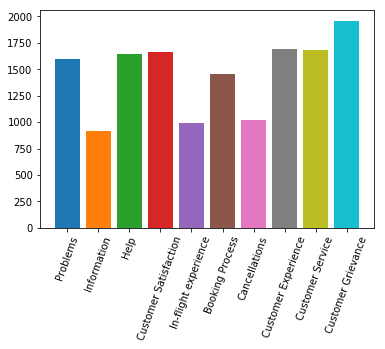

In [ ]:
# visualization for the number of tweets in each topic
cluster = {'Problems': 1595, 'Information': 915, 'Help': 1649, 'Customer Satisfaction': 1668, 'In-flight experience': 991, 'Booking Process': 1460,
           'Cancellations': 1021, 'Customer Experience': 1697, 'Customer Service': 1684, 'Customer Grievance': 1959}
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

x = plt.bar(*zip(*cluster.items()),color=cols)
plt.xticks(rotation=70)

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, document_term_matrix, dictionary=ldamodel.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.003729  0.096650       1        1  12.439190
4      0.137241  0.068230       2        1  11.603409
7     -0.003068 -0.045471       3        1  11.334200
2      0.131472 -0.013884       4        1  11.226174
5      0.077508  0.088646       5        1  11.133567
1     -0.182064 -0.024434       6        1   9.975121
9      0.120239 -0.152893       7        1   8.522522
8     -0.080238 -0.181415       8        1   8.200314
6     -0.094221  0.163088       9        1   8.040277
0     -0.110598  0.001484      10        1   7.525232, topic_info=     Category         Freq         Term        Total  loglift  logprob
term                                                                  
269   Default   787.000000     customer   787.000000  30.0000  30.0000
270   Default  1035.000000      service  1035.000000  29.0000  29.0000
76    Default  1060.000000         help  1060.000000  28.0000  28.0000
64    Default  1005.000000       thanks  1005.000000  27.0000  27.0000
315   Default  1432.000000    cancelled  1432.000000  26.0000  26.0000
301   Default   467.000000        thank   467.000000  25.0000  25.0000
218   Default   266.000000      minutes   266.000000  24.0000  24.0000
91    Default   209.000000         love   209.000000  23.0000  23.0000
159   Default   584.000000        phone   584.000000  22.0000  22.0000
383   Default   189.000000         info   189.000000  21.0000  21.0000
392   Default   419.000000      weather   419.000000  20.0000  20.0000
79    Default   280.000000         seat   280.000000  19.0000  19.0000
581   Default   430.000000      waiting   430.000000  18.0000  18.0000
200   Default   350.000000       ticket   350.000000  17.0000  17.0000
38    Default   334.000000         good   334.000000  16.0000  16.0000
2284  Default   257.000000     rebooked   257.000000  15.0000  15.0000
89    Default   211.000000        times   211.000000  14.0000  14.0000
21    Default   216.000000        seats   216.000000  13.0000  13.0000
293   Default   286.000000         bags   286.000000  12.0000  12.0000
3101  Default   109.000000         busy   109.000000  11.0000  11.0000
146   Default   201.000000     problems   201.000000  10.0000  10.0000
264   Default   329.000000       change   329.000000   9.0000   9.0000
8     Default   651.000000         need   651.000000   8.0000   8.0000
141   Default   159.000000      booking   159.000000   7.0000   7.0000
56    Default   280.000000        great   280.000000   6.0000   6.0000
482   Default   299.000000      luggage   299.000000   5.0000   5.0000
602   Default   110.000000        money   110.000000   4.0000   4.0000
451   Default   153.000000        hotel   153.000000   3.0000   3.0000
518   Default   154.000000       answer   154.000000   2.0000   2.0000
356   Default   219.000000   passengers   219.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
368   Topic10    45.455032       bought    50.348568   2.4847  -4.9779
66    Topic10    40.871506      country    45.527637   2.4790  -5.0842
310   Topic10    54.093494       member    62.035110   2.4499  -4.8039
1033  Topic10    69.093376        sucks    82.207703   2.4131  -4.5592
2867  Topic10    31.478594  explanation    34.986149   2.4813  -5.3453
671   Topic10    28.043840      charged    30.934942   2.4888  -5.4609
5067  Topic10    39.564098      holding    46.668339   2.4218  -5.1167
265   Topic10    73.864578       credit   103.278671   2.2517  -4.4924
180   Topic10   117.823784         book   194.325287   2.0866  -4.0254
738   Topic10    46.776344    passenger    62.988773   2.2893  -4.9493
531   Topic10    60.838928      tickets    92.921143   2.1634  -4.6864
263   Topic10    45.455711         card    62.986938   2.2607  -4.9779
540   Topic10    30.485977        error    37.150547   2.3892  -5.3774
200   Topic10   117.710739       ticket   3